## AutoEncoder inspired by "QCD or What?"
* Training and evaluation of an AE-based anomaly detection by Heimel et al in "QCD or What?" paper.
* Model inspired by figure 2 of their paper.

In [1]:
import os
import numpy as np
import tensorflow as tf

from tensorflow_addons.optimizers import AdamW

In [2]:
import ad

from ad import utils
from ad.models.others import HeimelAE

from typing import List, Tuple

In [3]:
utils.set_random_seed(42)
ad.plot.set_style(default_cmap=ad.plot.CMAP2)

Random seed 42 set.


In [4]:
%load_ext autoreload
%autoreload 2

Data

In [5]:
train = utils.read_npz(folder='data/n_tracks/train', dtype=np.float32,
                       keep='qcd', verbose=False,
                       shuffle=True, keys=['images', 'labels', 'masses'])
utils.free_mem()

# mask image
train['trk_mask'] = (train['images'][..., 0, np.newaxis] > 0.0).astype(np.float32)

Training

In [5]:
model = HeimelAE(image_shape=(72, 58, 1), latent_size=32,
                 encoder=dict(filters=[(10, None), (5, 5)],
                              units=[400, 100], kernel_initializer='he_uniform'),
                 decoder=dict(filters=[(5, 5), (5, 5)],
                              units=[100, 400], reshape_to=(20, 20, 1),
                              bias=-1.0, kernel_initializer='he_uniform'))
model.summary()

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 72, 58, 1)]       0         
                                                                 
 conv1-0 (Conv2D)            (None, 72, 58, 10)        100       
                                                                 
 PReLU1-0 (PReLU)            (None, 72, 58, 10)        10        
                                                                 
 avg_pool-0 (AveragePooling2  (None, 36, 29, 10)       0         
 D)                                                              
                                                                 
 conv1-1 (Conv2D)            (None, 36, 29, 5)         455       
                                                                 
 PReLU1-1 (PReLU)            (None, 36, 29, 5)         5         
                                                           

In [8]:
model.compile(optimizer=AdamW(weight_decay=1e-4, clipnorm=1.0),
              loss=HeimelAE.mse_loss)

checkpoint = utils.get_checkpoint(path='qcd_what_ae', monitor='val_loss',
                                  mode='min', best_only=True)

plot = ad.callbacks.PlotCallback(path=None, data=train['trk_mask'], amount=5, freq=5,
                                 cmap=ad.plot.CMAP3, v_max=1.0)

Epoch 1/50
267/267 [==============================] - ETA: 0s - loss: 91.7513 - mse: 124.2180 - ssim: 0.3540 - true_energy: 81.2595 - pred_energy: 205.5578 - grads_norm: 214.9508 - weights_norm: 46.9424

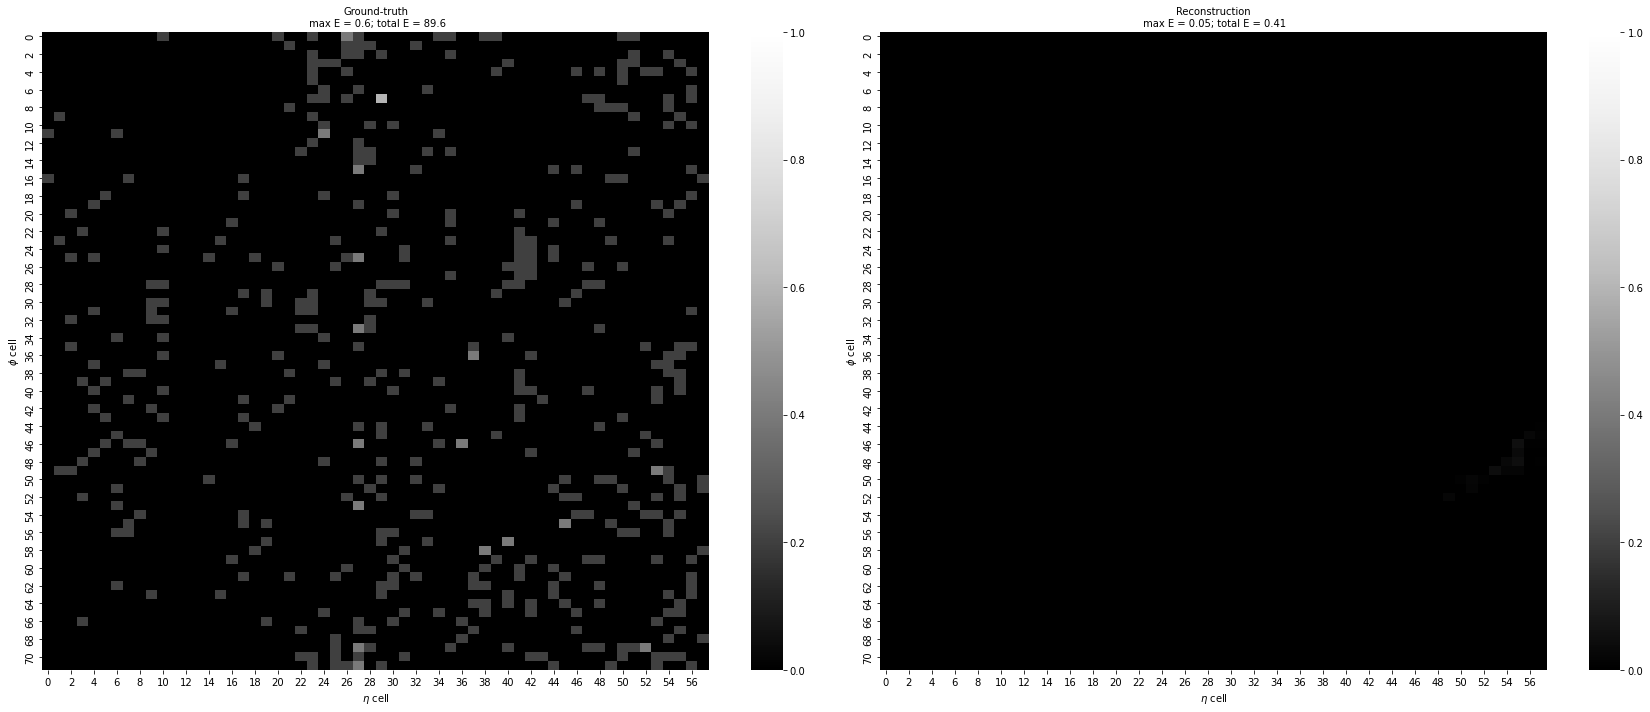

267/267 [==============================] - 70s 233ms/step - loss: 91.7513 - mse: 124.0969 - ssim: 0.3544 - true_energy: 81.2586 - pred_energy: 204.9882 - grads_norm: 214.3806 - weights_norm: 46.9423 - val_loss: 89.7529 - val_mse: 89.7529 - val_ssim: 0.4711 - val_true_energy: 81.1814 - val_pred_energy: 42.3852
Epoch 2/50
267/267 [==============================] - 60s 225ms/step - loss: 85.6813 - mse: 87.3781 - ssim: 0.4723 - true_energy: 81.1295 - pred_energy: 33.0324 - grads_norm: 43.2276 - weights_norm: 46.6327 - val_loss: 85.0918 - val_mse: 85.0918 - val_ssim: 0.4161 - val_true_energy: 81.1814 - val_pred_energy: 39.5406
Epoch 3/50
267/267 [==============================] - 60s 226ms/step - loss: 82.6836 - mse: 83.8351 - ssim: 0.3993 - true_energy: 81.1652 - pred_energy: 45.6117 - grads_norm: 27.4876 - weights_norm: 46.7534 - val_loss: 82.2547 - val_mse: 82.2547 - val_ssim: 0.3919 - val_true_energy: 81.1814 - val_pred_energy: 51.5825
Epoch 4/50
267/267 [==============================]

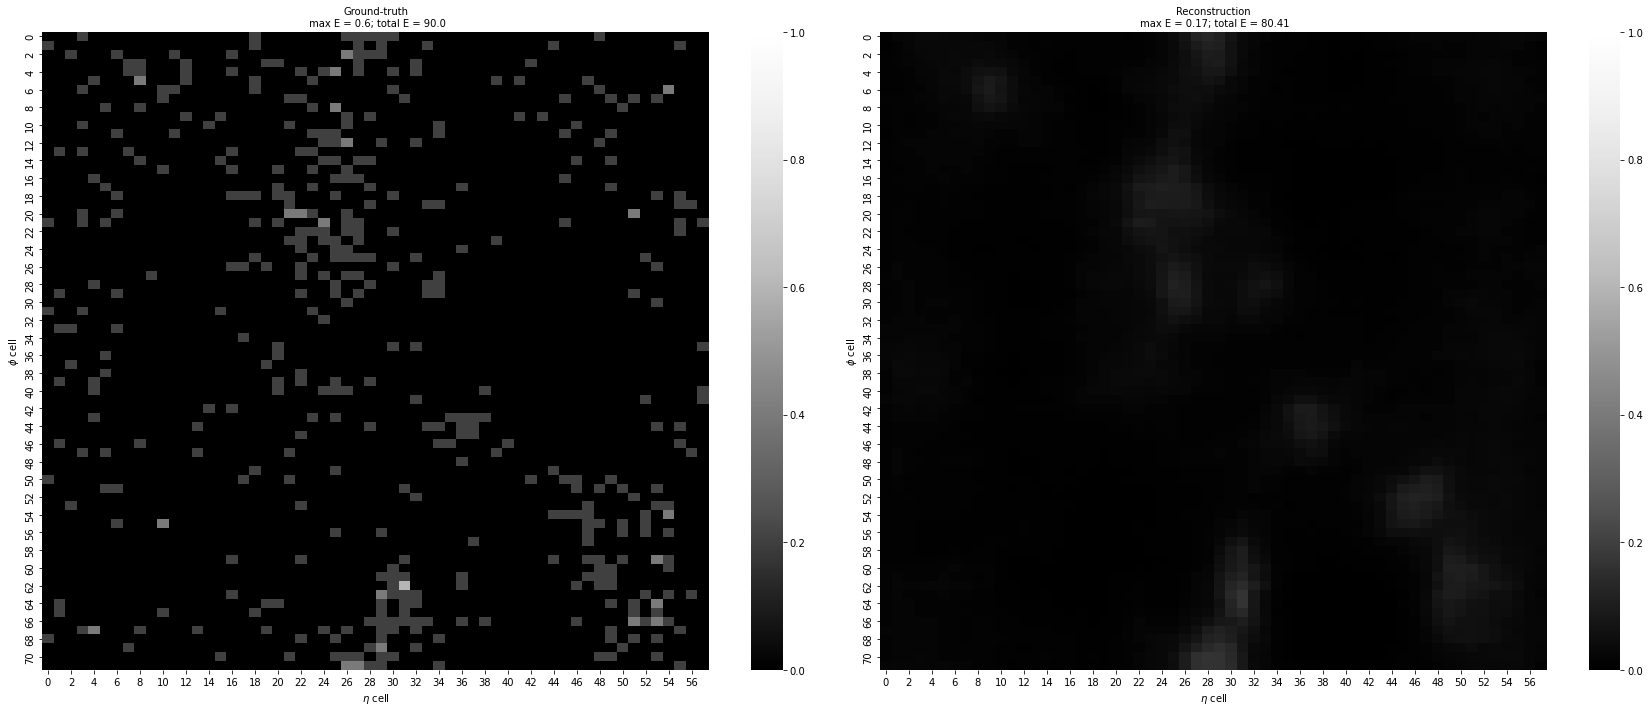

267/267 [==============================] - 62s 232ms/step - loss: 78.5078 - mse: 78.8556 - ssim: 0.3798 - true_energy: 81.1694 - pred_energy: 62.6570 - grads_norm: 22.1237 - weights_norm: 50.8777 - val_loss: 78.3715 - val_mse: 78.3715 - val_ssim: 0.3781 - val_true_energy: 81.1813 - val_pred_energy: 64.0125
Epoch 7/50
267/267 [==============================] - 61s 227ms/step - loss: 77.8173 - mse: 78.0824 - ssim: 0.3767 - true_energy: 81.1736 - pred_energy: 64.9296 - grads_norm: 23.8872 - weights_norm: 51.8121 - val_loss: 77.7124 - val_mse: 77.7124 - val_ssim: 0.3748 - val_true_energy: 81.1813 - val_pred_energy: 66.0971
Epoch 8/50
267/267 [==============================] - 60s 226ms/step - loss: 77.2620 - mse: 77.4828 - ssim: 0.3737 - true_energy: 81.1744 - pred_energy: 66.7709 - grads_norm: 24.7542 - weights_norm: 52.5548 - val_loss: 77.1793 - val_mse: 77.1793 - val_ssim: 0.3723 - val_true_energy: 81.1813 - val_pred_energy: 67.6509
Epoch 9/50
267/267 [==============================] - 

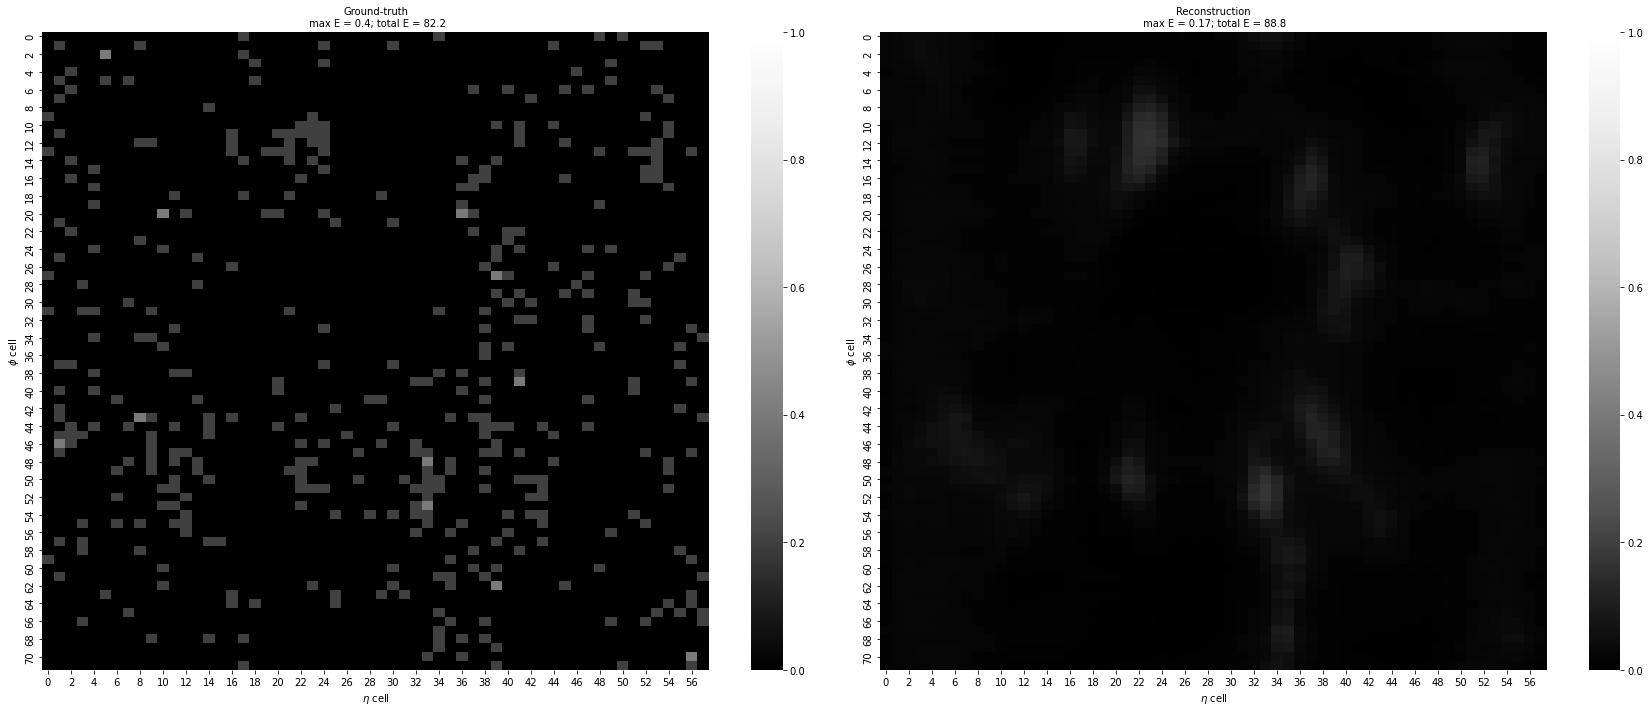

267/267 [==============================] - 65s 244ms/step - loss: 76.1269 - mse: 76.2551 - ssim: 0.3684 - true_energy: 81.1778 - pred_energy: 70.0699 - grads_norm: 24.8192 - weights_norm: 54.1344 - val_loss: 76.0827 - val_mse: 76.0827 - val_ssim: 0.3667 - val_true_energy: 81.1814 - val_pred_energy: 70.8769
Epoch 12/50
267/267 [==============================] - 60s 226ms/step - loss: 75.8585 - mse: 75.9640 - ssim: 0.3661 - true_energy: 81.1708 - pred_energy: 71.2104 - grads_norm: 27.6567 - weights_norm: 54.5449 - val_loss: 75.8218 - val_mse: 75.8218 - val_ssim: 0.3657 - val_true_energy: 81.1813 - val_pred_energy: 71.4155
Epoch 13/50
267/267 [==============================] - 60s 226ms/step - loss: 75.6244 - mse: 75.7193 - ssim: 0.3652 - true_energy: 81.1743 - pred_energy: 71.6707 - grads_norm: 28.7529 - weights_norm: 54.9189 - val_loss: 75.5891 - val_mse: 75.5891 - val_ssim: 0.3646 - val_true_energy: 81.1814 - val_pred_energy: 72.0573
Epoch 14/50
267/267 [==============================]

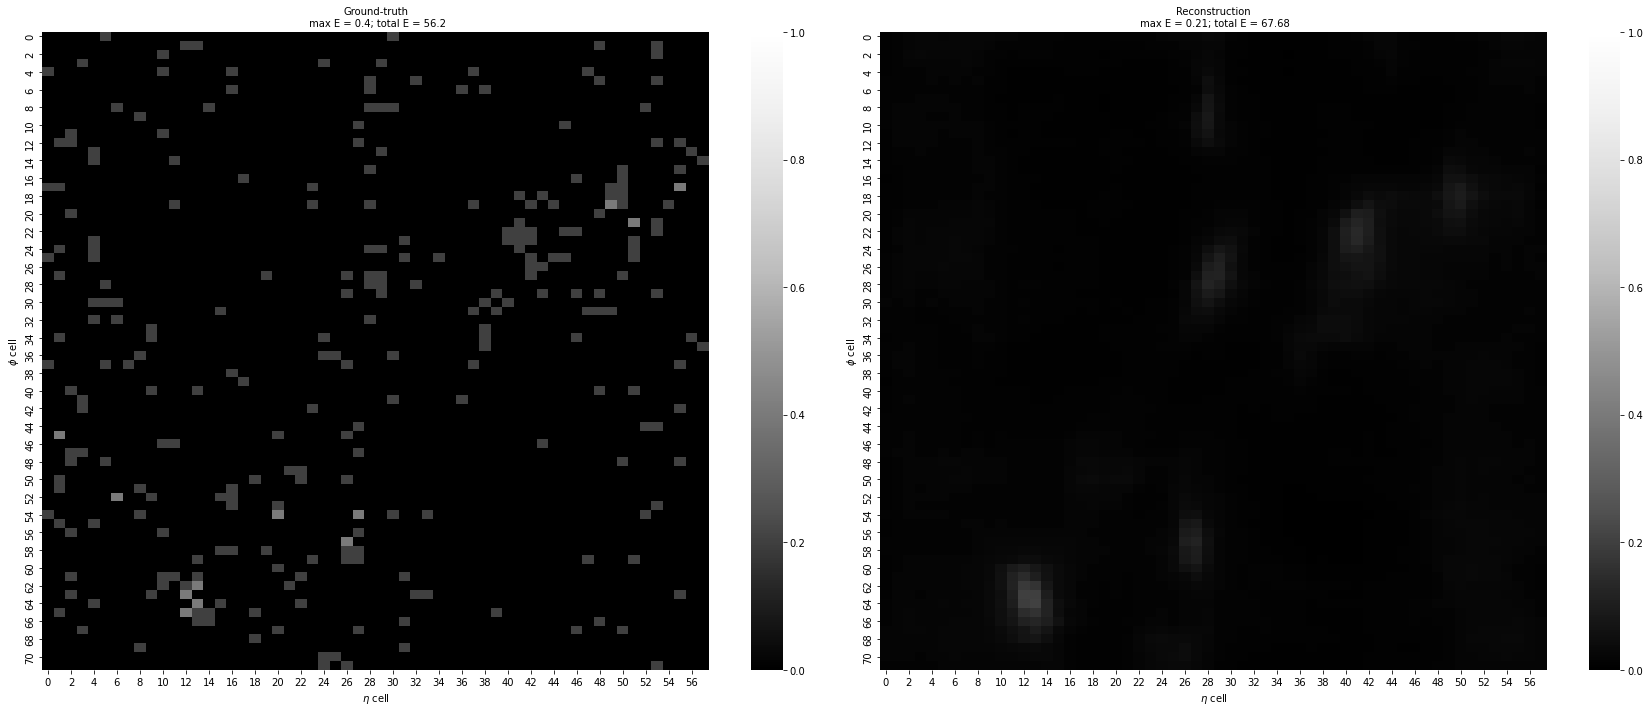

267/267 [==============================] - 60s 225ms/step - loss: 75.0544 - mse: 75.1185 - ssim: 0.3628 - true_energy: 81.1737 - pred_energy: 73.1385 - grads_norm: 31.2012 - weights_norm: 55.9485 - val_loss: 75.0294 - val_mse: 75.0294 - val_ssim: 0.3621 - val_true_energy: 81.1814 - val_pred_energy: 73.4837
Epoch 17/50
267/267 [==============================] - 59s 220ms/step - loss: 74.8984 - mse: 74.9671 - ssim: 0.3618 - true_energy: 81.1827 - pred_energy: 73.6434 - grads_norm: 31.7143 - weights_norm: 56.2641 - val_loss: 74.8788 - val_mse: 74.8788 - val_ssim: 0.3610 - val_true_energy: 81.1814 - val_pred_energy: 74.0603
Epoch 18/50
267/267 [==============================] - 59s 221ms/step - loss: 74.7586 - mse: 74.8213 - ssim: 0.3606 - true_energy: 81.1807 - pred_energy: 74.2178 - grads_norm: 32.3720 - weights_norm: 56.5845 - val_loss: 74.7379 - val_mse: 74.7379 - val_ssim: 0.3604 - val_true_energy: 81.1814 - val_pred_energy: 74.3393
Epoch 19/50
267/267 [==============================]

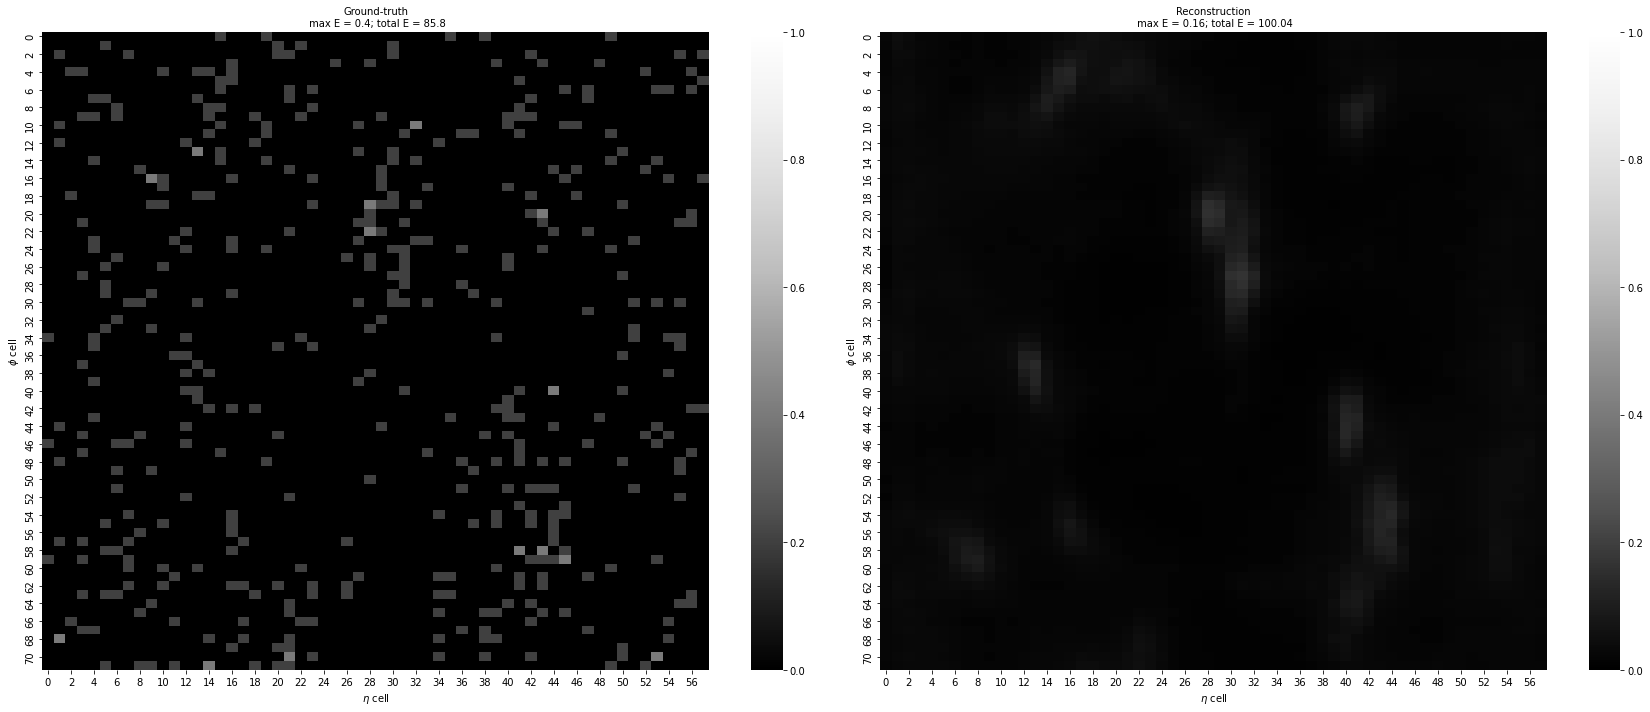

267/267 [==============================] - 60s 223ms/step - loss: 74.3903 - mse: 74.4402 - ssim: 0.3594 - true_energy: 81.1804 - pred_energy: 74.9783 - grads_norm: 33.1230 - weights_norm: 57.4841 - val_loss: 74.3740 - val_mse: 74.3740 - val_ssim: 0.3589 - val_true_energy: 81.1815 - val_pred_energy: 75.2134
Epoch 22/50
267/267 [==============================] - 60s 224ms/step - loss: 74.2825 - mse: 74.3275 - ssim: 0.3588 - true_energy: 81.1787 - pred_energy: 75.3003 - grads_norm: 33.1053 - weights_norm: 57.7453 - val_loss: 74.2690 - val_mse: 74.2690 - val_ssim: 0.3588 - val_true_energy: 81.1815 - val_pred_energy: 75.3098
Epoch 23/50
267/267 [==============================] - 60s 223ms/step - loss: 74.1844 - mse: 74.2287 - ssim: 0.3586 - true_energy: 81.1819 - pred_energy: 75.4027 - grads_norm: 33.1247 - weights_norm: 57.9983 - val_loss: 74.1714 - val_mse: 74.1714 - val_ssim: 0.3586 - val_true_energy: 81.1815 - val_pred_energy: 75.4155
Epoch 24/50
267/267 [==============================]

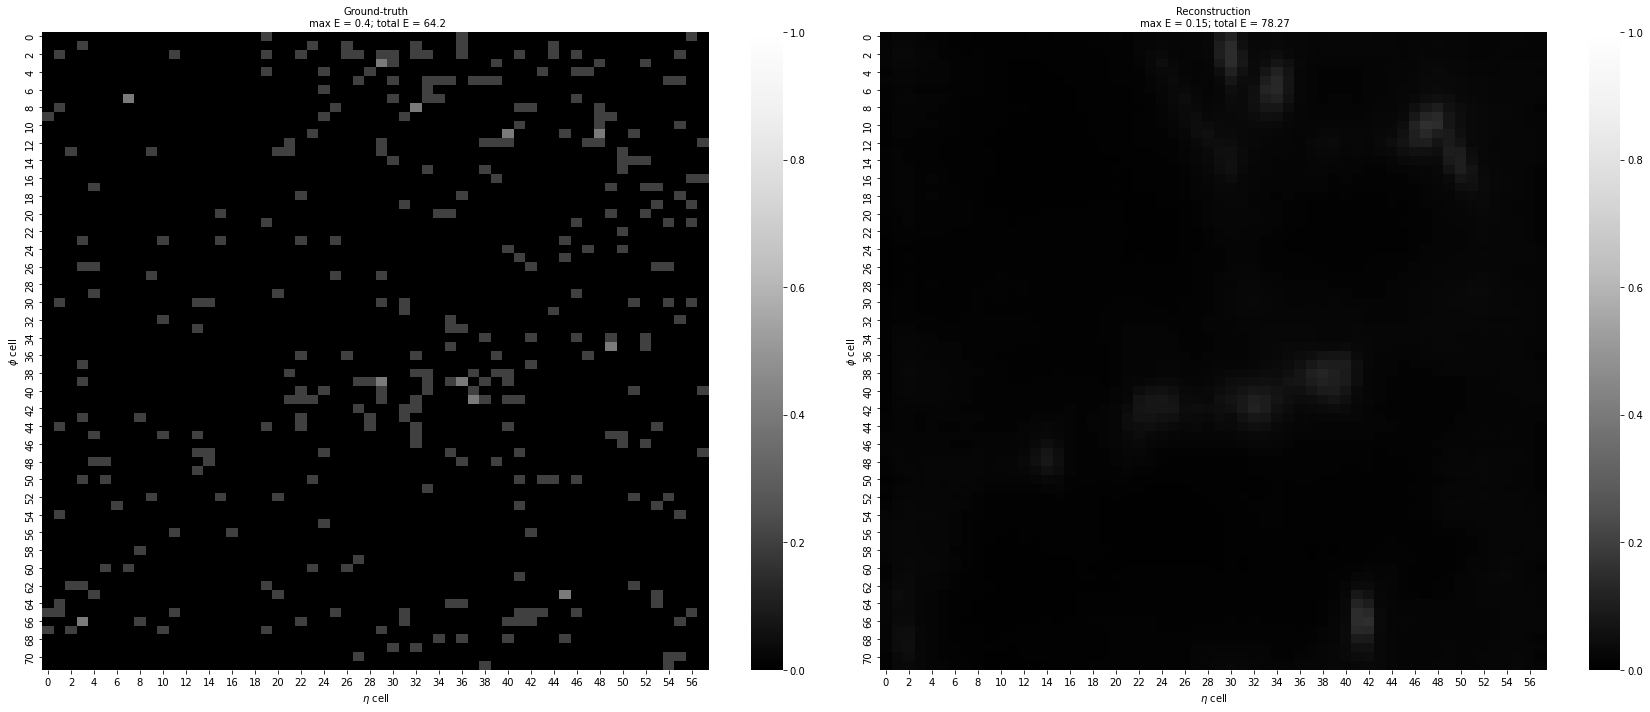

267/267 [==============================] - 61s 228ms/step - loss: 73.9135 - mse: 73.9519 - ssim: 0.3579 - true_energy: 81.1819 - pred_energy: 75.8730 - grads_norm: 32.8348 - weights_norm: 58.7098 - val_loss: 73.9023 - val_mse: 73.9023 - val_ssim: 0.3575 - val_true_energy: 81.1815 - val_pred_energy: 76.0500
Epoch 27/50
267/267 [==============================] - 60s 224ms/step - loss: 73.8323 - mse: 73.8675 - ssim: 0.3574 - true_energy: 81.1797 - pred_energy: 76.1138 - grads_norm: 32.7406 - weights_norm: 58.9310 - val_loss: 73.8211 - val_mse: 73.8211 - val_ssim: 0.3571 - val_true_energy: 81.1815 - val_pred_energy: 76.2498
Epoch 28/50
267/267 [==============================] - 60s 224ms/step - loss: 73.7531 - mse: 73.7874 - ssim: 0.3571 - true_energy: 81.1797 - pred_energy: 76.3005 - grads_norm: 32.2348 - weights_norm: 59.1473 - val_loss: 73.7433 - val_mse: 73.7433 - val_ssim: 0.3568 - val_true_energy: 81.1816 - val_pred_energy: 76.4553
Epoch 29/50
267/267 [==============================]

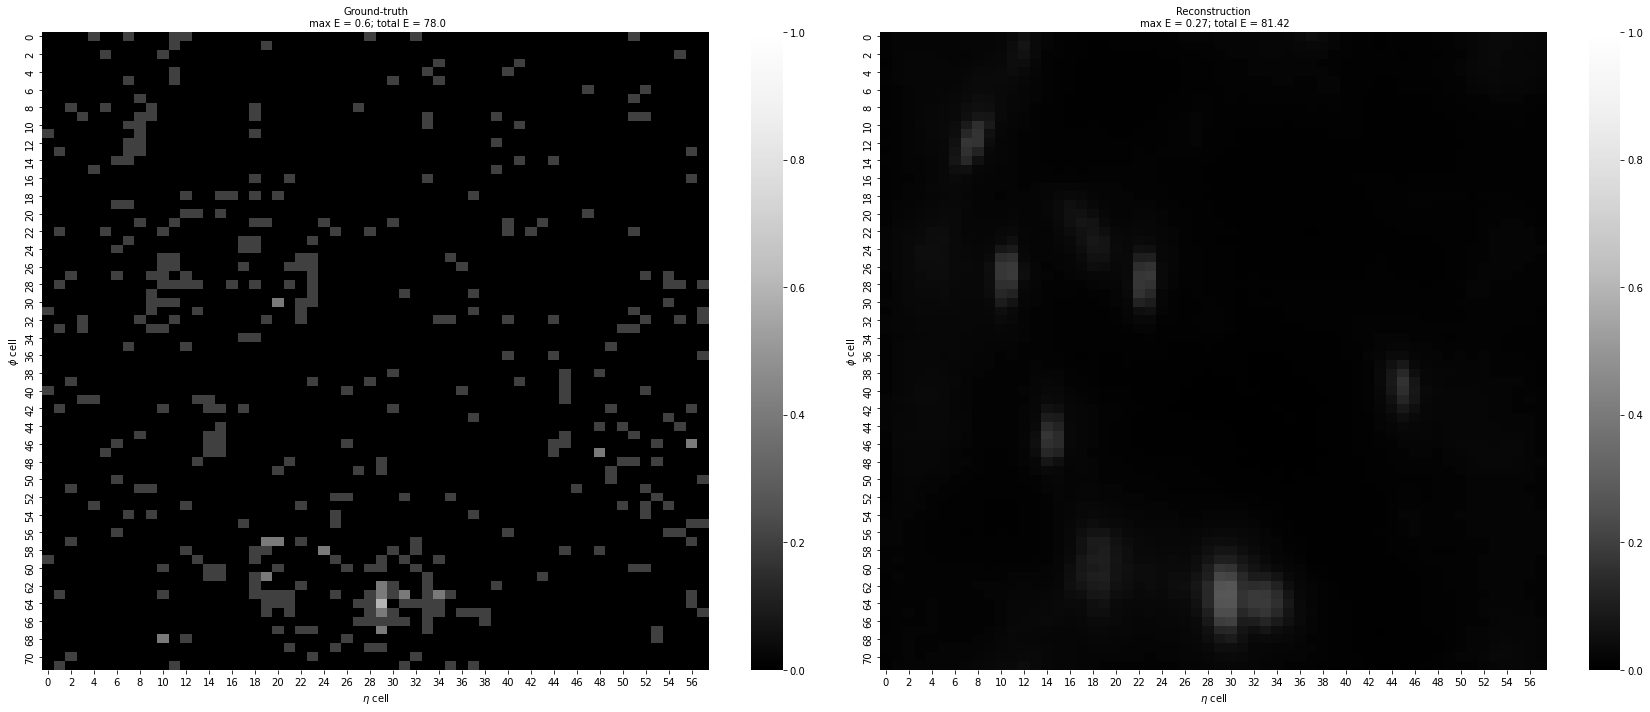

267/267 [==============================] - 61s 229ms/step - loss: 73.5409 - mse: 73.5698 - ssim: 0.3562 - true_energy: 81.1801 - pred_energy: 76.7898 - grads_norm: 30.7273 - weights_norm: 59.7096 - val_loss: 73.5316 - val_mse: 73.5316 - val_ssim: 0.3560 - val_true_energy: 81.1815 - val_pred_energy: 76.8886
Epoch 32/50
267/267 [==============================] - 61s 228ms/step - loss: 73.4752 - mse: 73.5016 - ssim: 0.3559 - true_energy: 81.1784 - pred_energy: 76.9233 - grads_norm: 30.1752 - weights_norm: 59.8730 - val_loss: 73.4660 - val_mse: 73.4660 - val_ssim: 0.3558 - val_true_energy: 81.1816 - val_pred_energy: 76.9904
Epoch 33/50
267/267 [==============================] - 60s 225ms/step - loss: 73.4112 - mse: 73.4392 - ssim: 0.3557 - true_energy: 81.1805 - pred_energy: 77.0272 - grads_norm: 29.6261 - weights_norm: 60.0245 - val_loss: 73.4029 - val_mse: 73.4029 - val_ssim: 0.3554 - val_true_energy: 81.1816 - val_pred_energy: 77.1484
Epoch 34/50
267/267 [==============================]

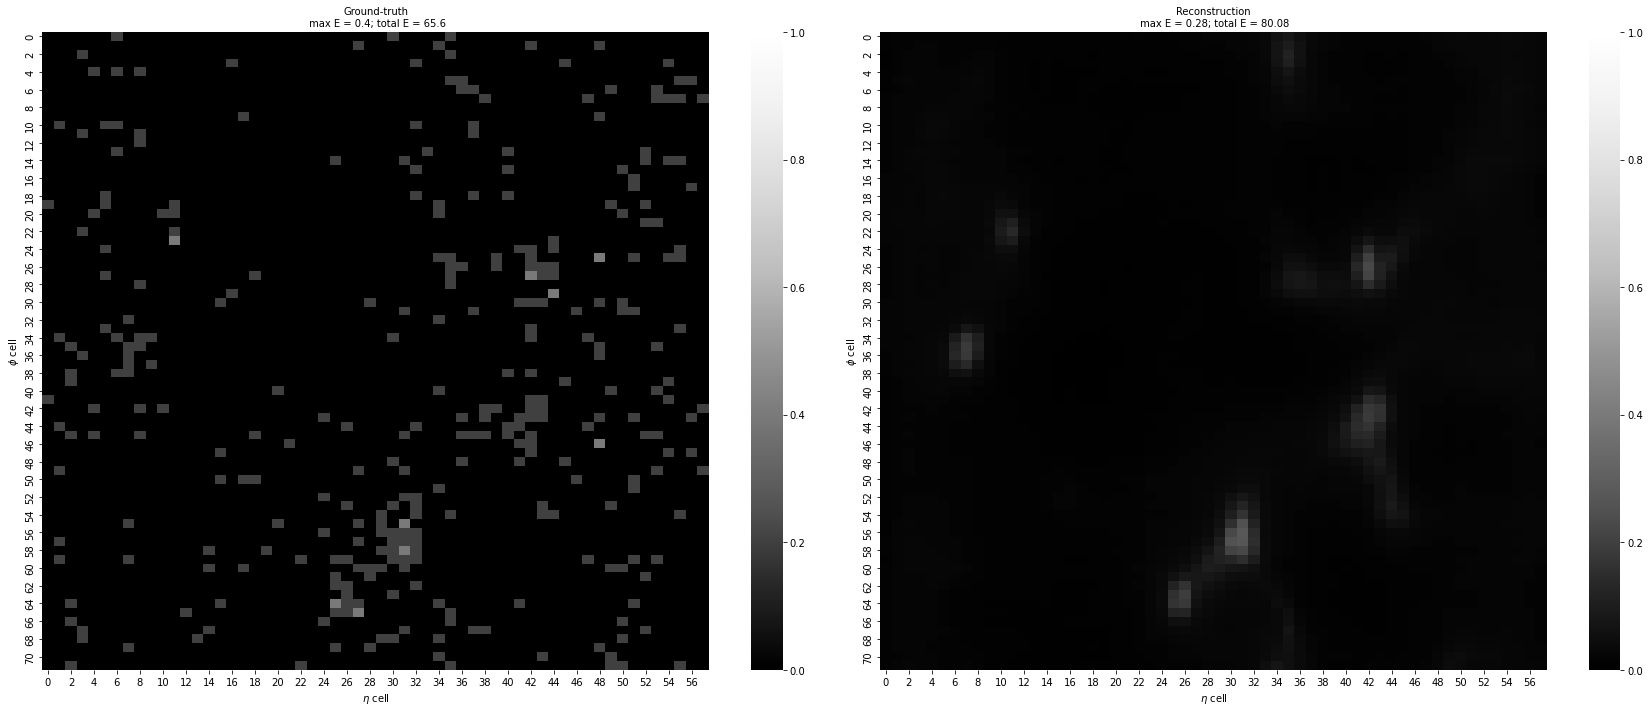

267/267 [==============================] - 63s 236ms/step - loss: 73.2359 - mse: 73.2594 - ssim: 0.3549 - true_energy: 81.1791 - pred_energy: 77.3881 - grads_norm: 28.1795 - weights_norm: 60.4224 - val_loss: 73.2284 - val_mse: 73.2284 - val_ssim: 0.3547 - val_true_energy: 81.1816 - val_pred_energy: 77.4847
Epoch 37/50
267/267 [==============================] - 63s 234ms/step - loss: 73.1801 - mse: 73.2032 - ssim: 0.3546 - true_energy: 81.1783 - pred_energy: 77.5118 - grads_norm: 27.7384 - weights_norm: 60.5392 - val_loss: 73.1731 - val_mse: 73.1731 - val_ssim: 0.3544 - val_true_energy: 81.1816 - val_pred_energy: 77.5890
Epoch 38/50
267/267 [==============================] - 62s 232ms/step - loss: 73.1281 - mse: 73.1518 - ssim: 0.3544 - true_energy: 81.1819 - pred_energy: 77.6174 - grads_norm: 27.3270 - weights_norm: 60.6501 - val_loss: 73.1213 - val_mse: 73.1213 - val_ssim: 0.3544 - val_true_energy: 81.1817 - val_pred_energy: 77.6312
Epoch 39/50
267/267 [==============================]

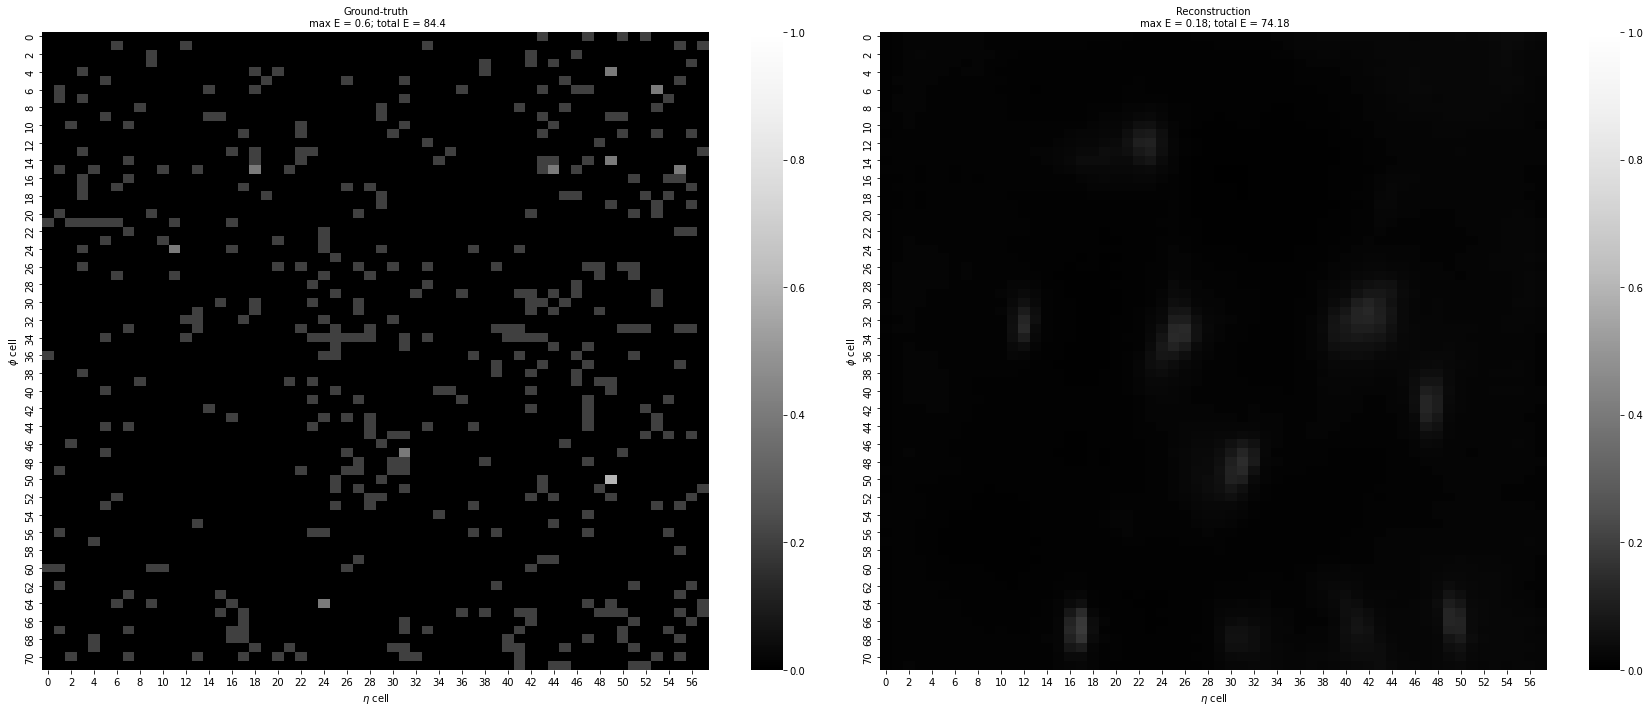

267/267 [==============================] - 63s 235ms/step - loss: 72.9826 - mse: 73.0035 - ssim: 0.3541 - true_energy: 81.1807 - pred_energy: 77.7992 - grads_norm: 26.2132 - weights_norm: 60.9487 - val_loss: 72.9768 - val_mse: 72.9768 - val_ssim: 0.3541 - val_true_energy: 81.1817 - val_pred_energy: 77.7976
Epoch 42/50
267/267 [==============================] - 61s 230ms/step - loss: 72.9380 - mse: 72.9581 - ssim: 0.3541 - true_energy: 81.1815 - pred_energy: 77.8207 - grads_norm: 25.8777 - weights_norm: 61.0373 - val_loss: 72.9323 - val_mse: 72.9323 - val_ssim: 0.3541 - val_true_energy: 81.1817 - val_pred_energy: 77.8377
Epoch 43/50
267/267 [==============================] - 62s 232ms/step - loss: 72.8941 - mse: 72.9114 - ssim: 0.3541 - true_energy: 81.1786 - pred_energy: 77.8563 - grads_norm: 25.5573 - weights_norm: 61.1225 - val_loss: 72.8883 - val_mse: 72.8883 - val_ssim: 0.3540 - val_true_energy: 81.1816 - val_pred_energy: 77.8980
Epoch 44/50
267/267 [==============================]

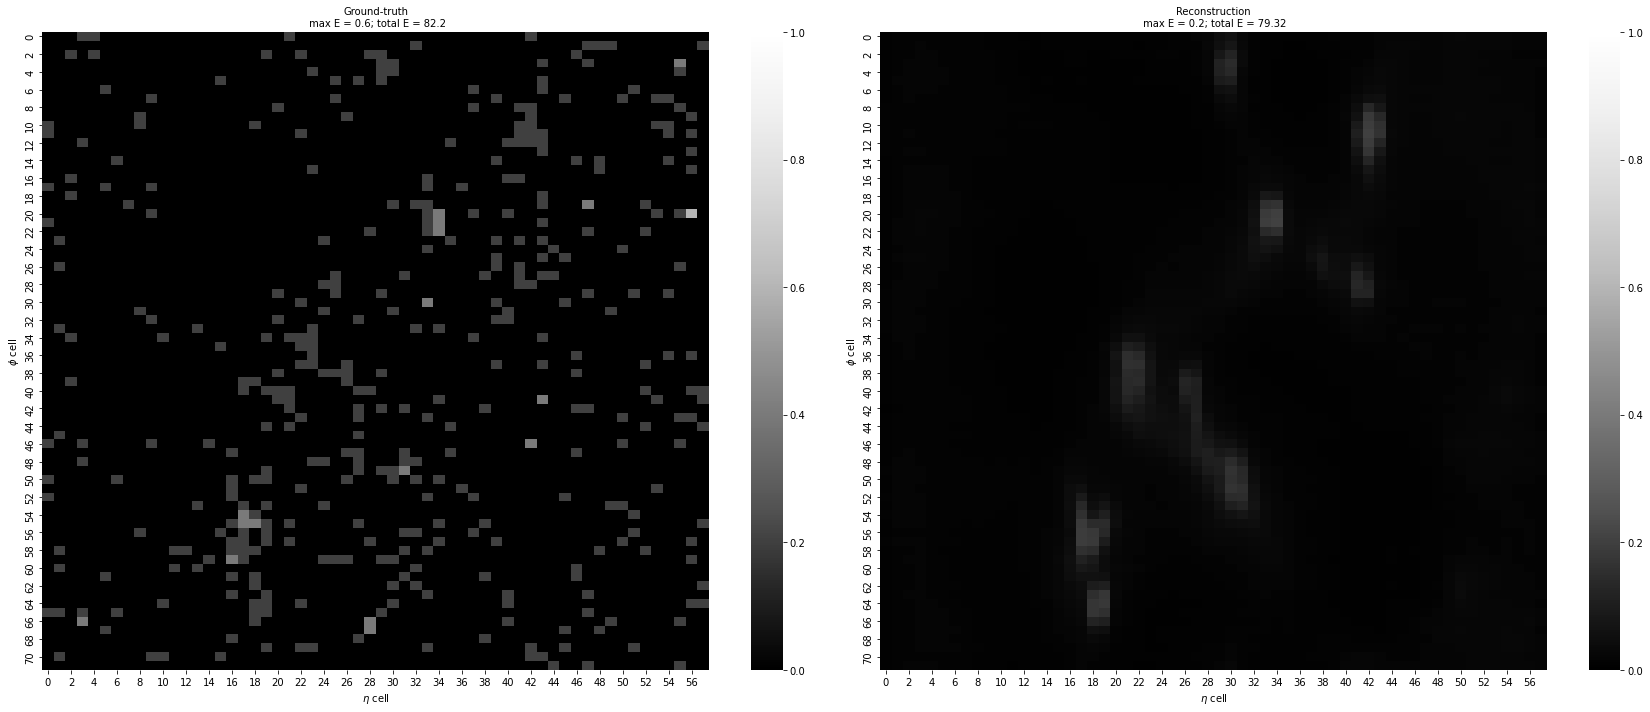

267/267 [==============================] - 58s 217ms/step - loss: 72.7707 - mse: 72.7877 - ssim: 0.3538 - true_energy: 81.1804 - pred_energy: 78.0174 - grads_norm: 24.6704 - weights_norm: 61.3502 - val_loss: 72.7656 - val_mse: 72.7656 - val_ssim: 0.3538 - val_true_energy: 81.1817 - val_pred_energy: 78.0439
Epoch 47/50
267/267 [==============================] - 59s 220ms/step - loss: 72.7325 - mse: 72.7495 - ssim: 0.3538 - true_energy: 81.1812 - pred_energy: 78.0635 - grads_norm: 24.3793 - weights_norm: 61.4183 - val_loss: 72.7278 - val_mse: 72.7278 - val_ssim: 0.3538 - val_true_energy: 81.1816 - val_pred_energy: 78.0855
Epoch 48/50
267/267 [==============================] - 58s 218ms/step - loss: 72.6956 - mse: 72.7113 - ssim: 0.3537 - true_energy: 81.1804 - pred_energy: 78.1035 - grads_norm: 24.0990 - weights_norm: 61.4826 - val_loss: 72.6910 - val_mse: 72.6910 - val_ssim: 0.3537 - val_true_energy: 81.1816 - val_pred_energy: 78.1280
Epoch 49/50
267/267 [==============================]

In [9]:
h = model.fit(x=train['trk_mask'], epochs=50, validation_split=0.25,
              verbose=1, batch_size=128, callbacks=[plot, checkpoint])

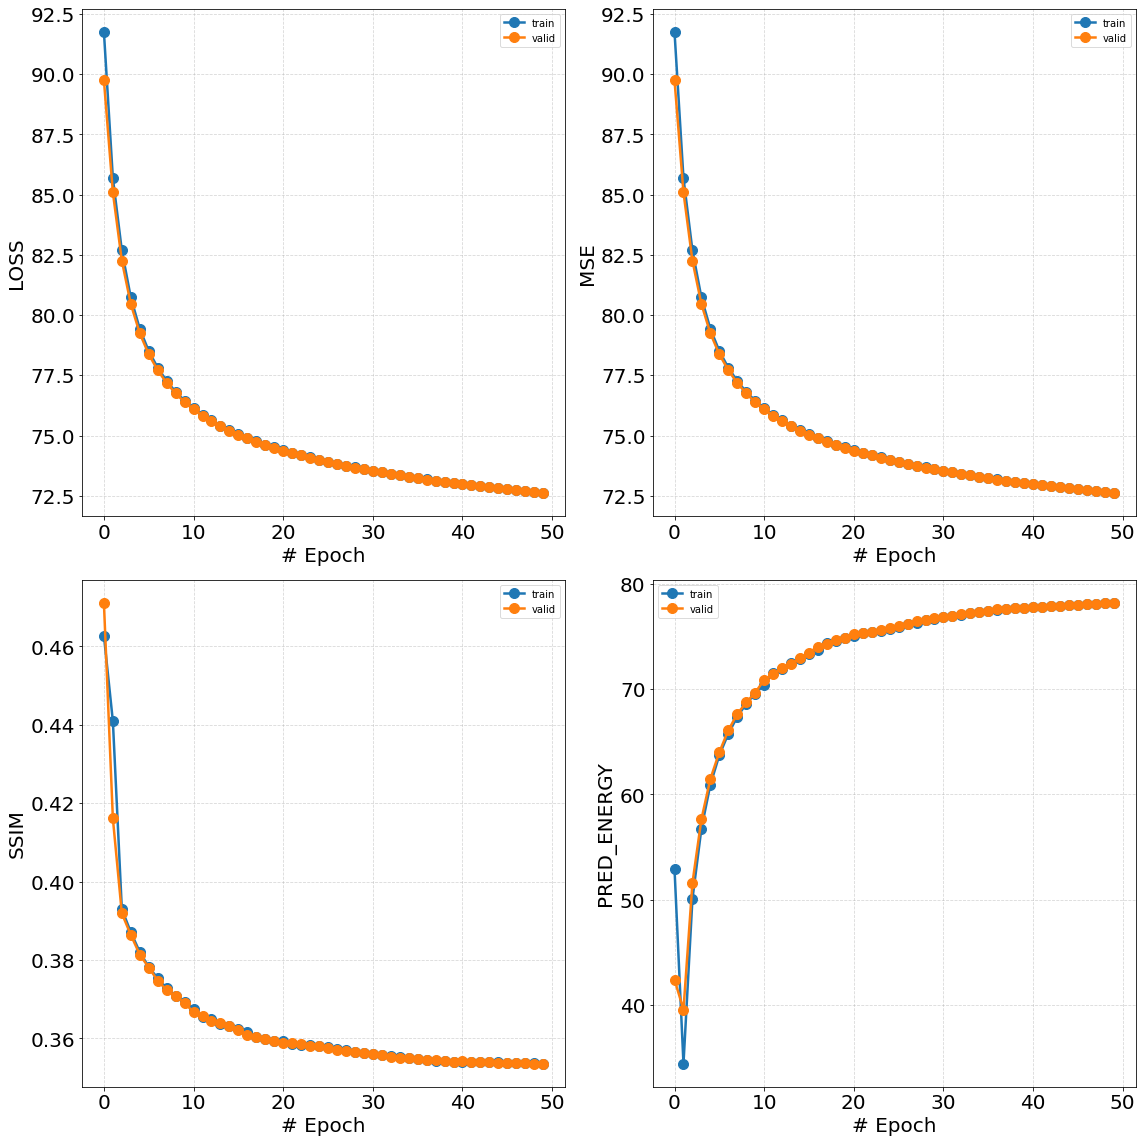

In [15]:
ad.plot.history(h, keys=['loss', 'mse', 'ssim', 'pred_energy'])

Evaluation

In [6]:
utils.load_from_checkpoint(model, path='qcd_what_ae', mode='min')

Loaded from "weights\qcd_what_ae\weights-50-72.620"


In [7]:
data = utils.read_npz(folder=os.path.join('data/n_tracks', 'test'),
                    dtype=np.float32, verbose=False,
                  keys=['images', 'labels', 'masses'])

x_mask = (data['images'][..., 0, np.newaxis] > 0.0).astype(np.float32)
y_test = data['labels']
m_test = data['masses']

2686/2686 [==============================] - 210s 78ms/step
QCD


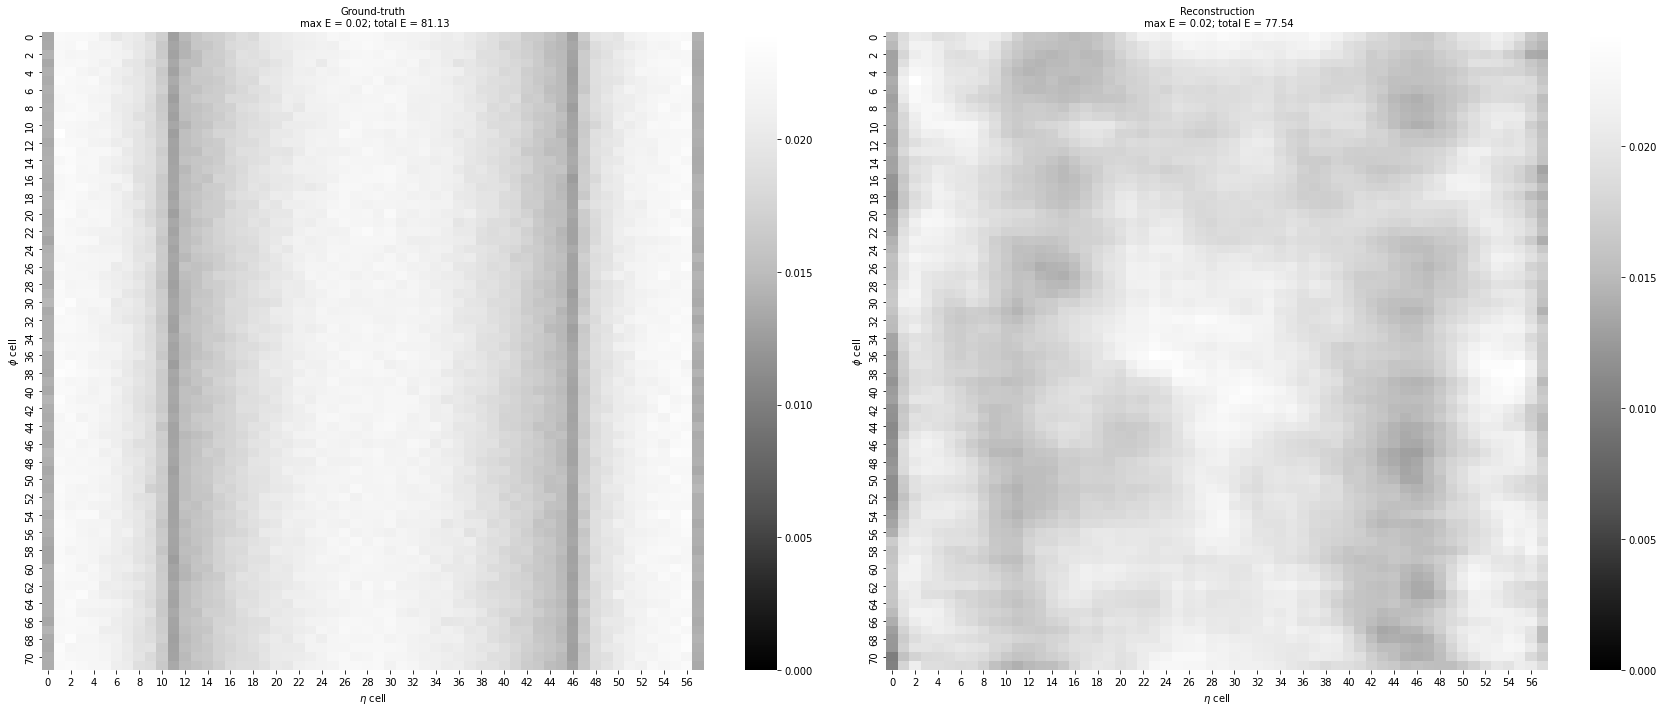

SUEP (125)


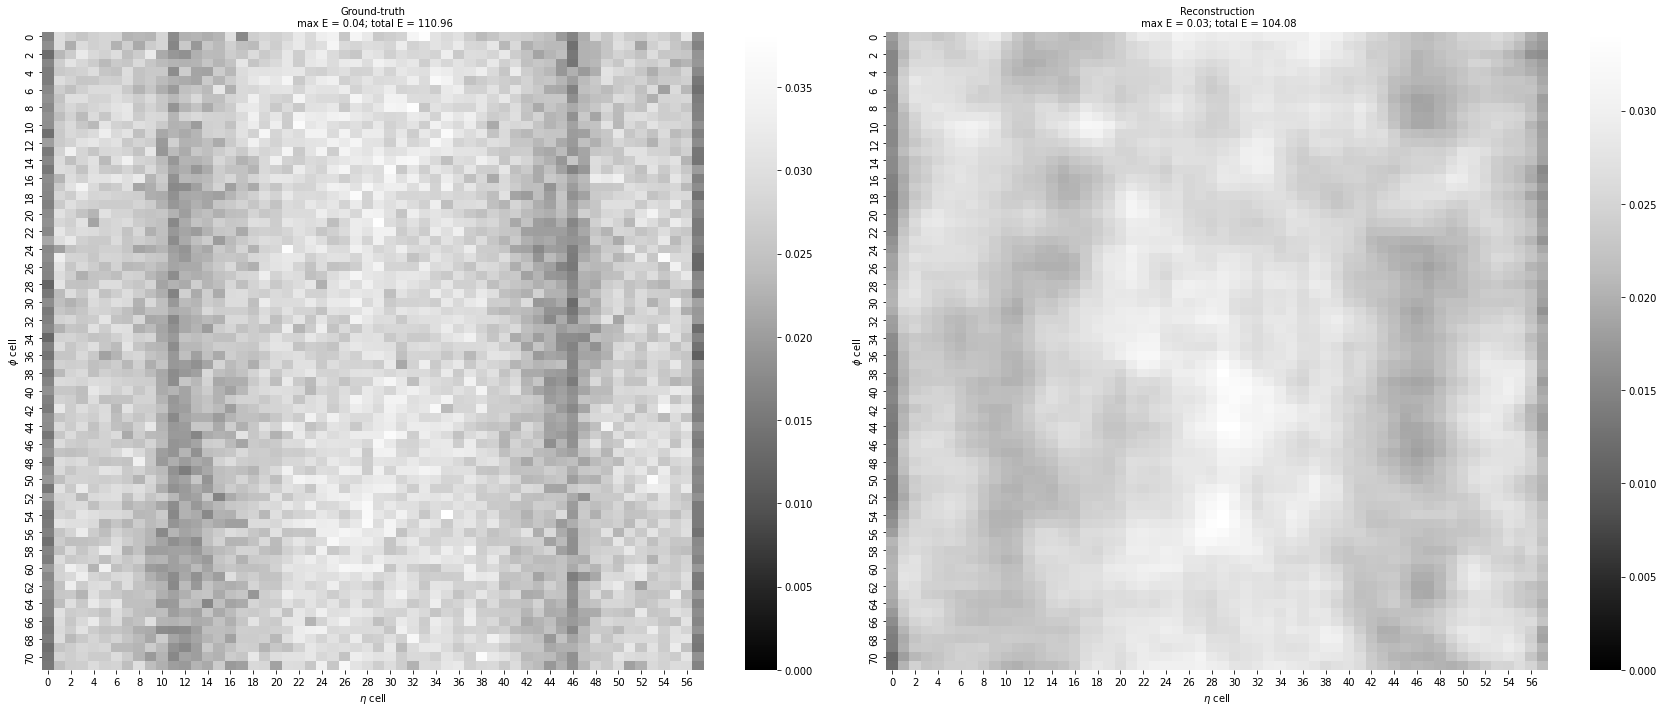

SUEP (200)


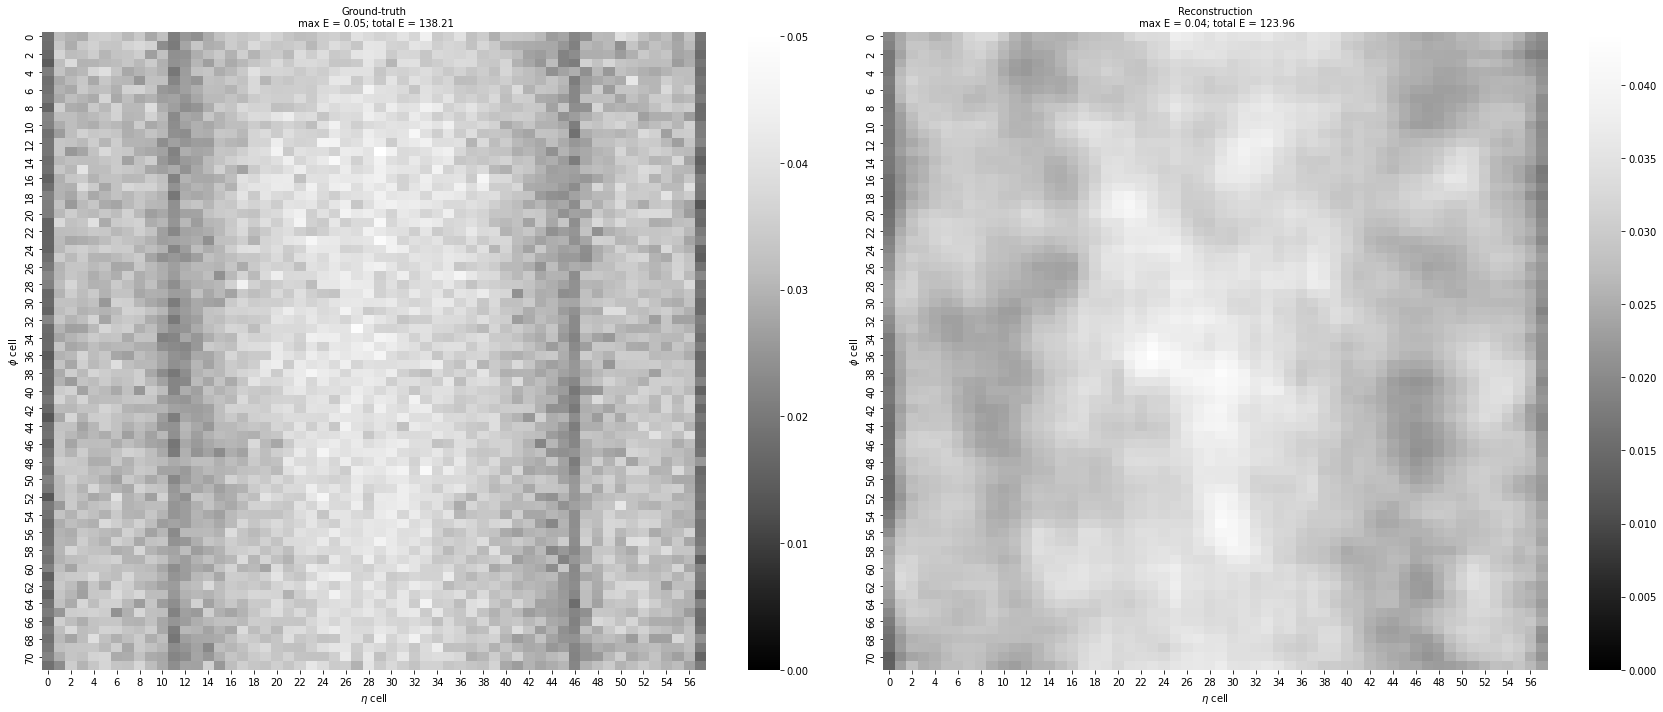

SUEP (300)


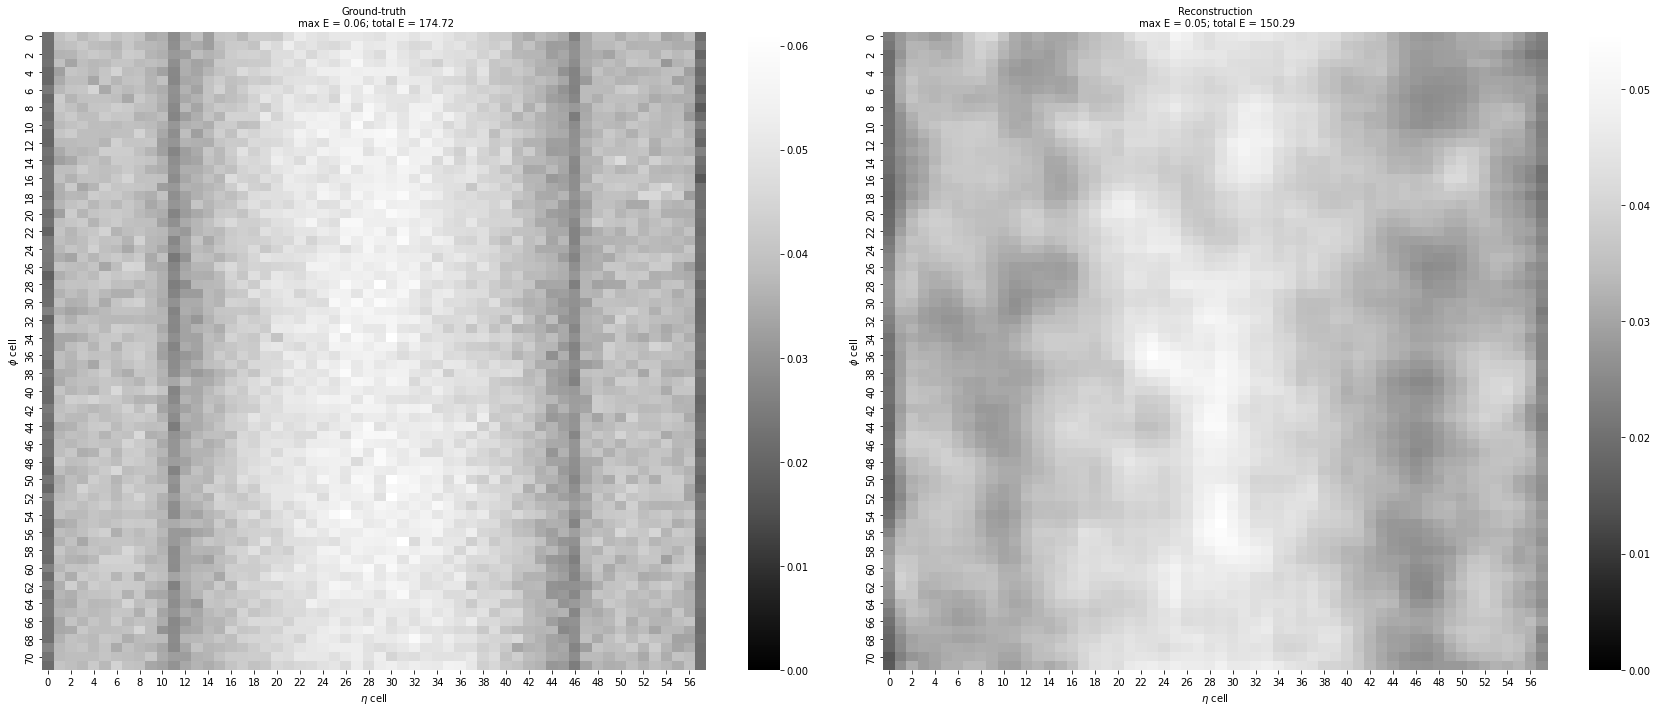

SUEP (400)


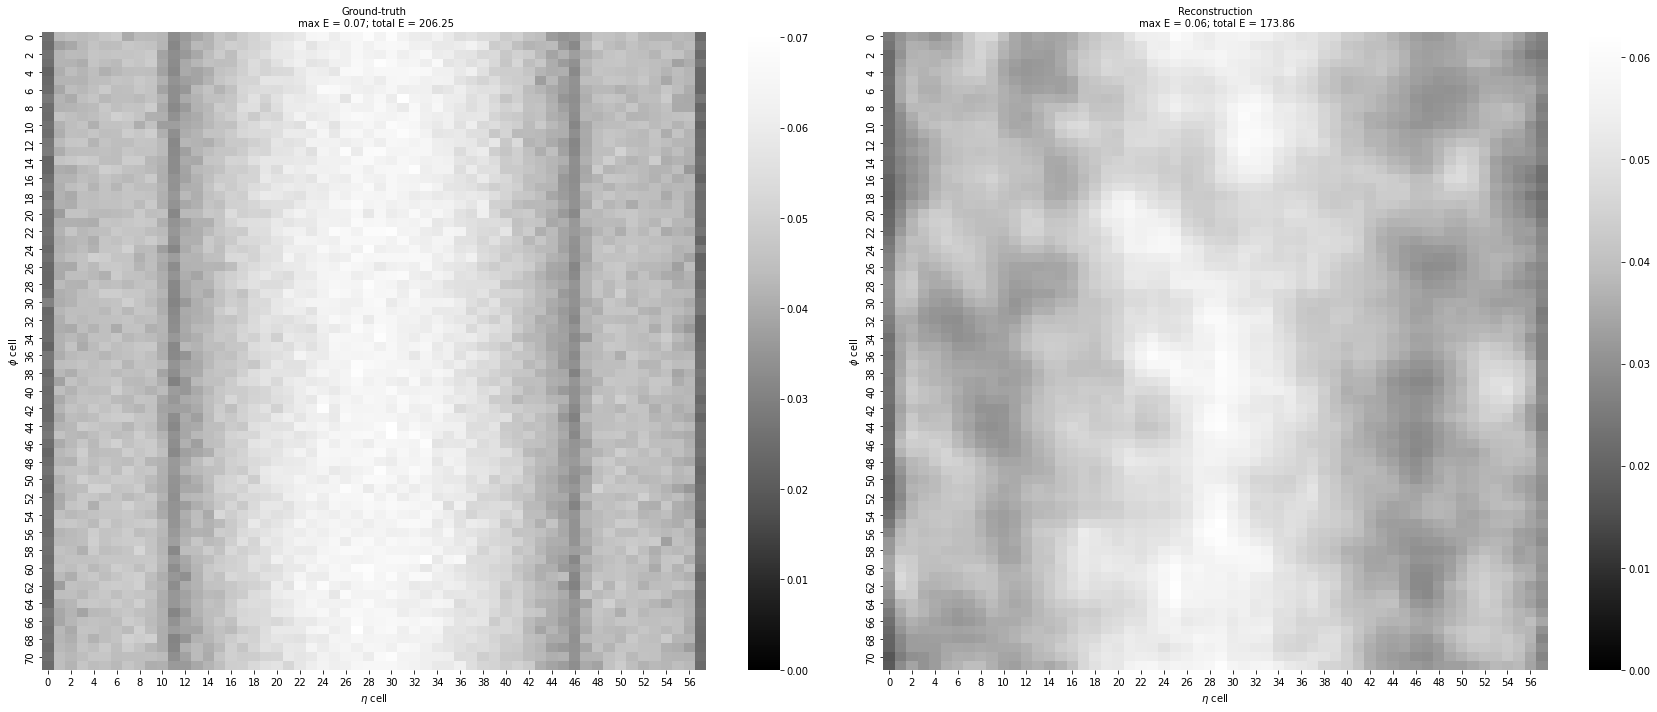

SUEP (700)


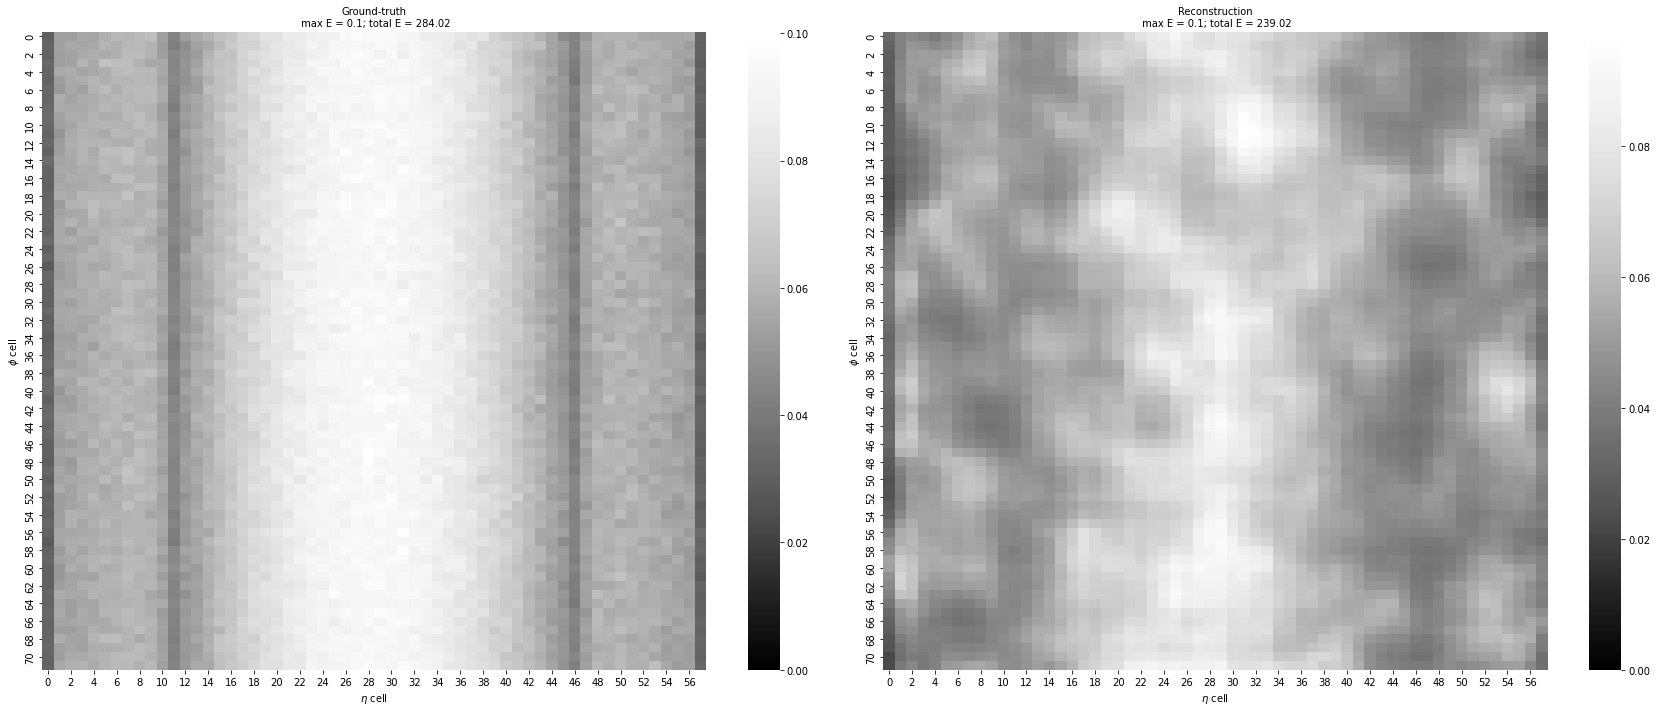

SUEP (1000)


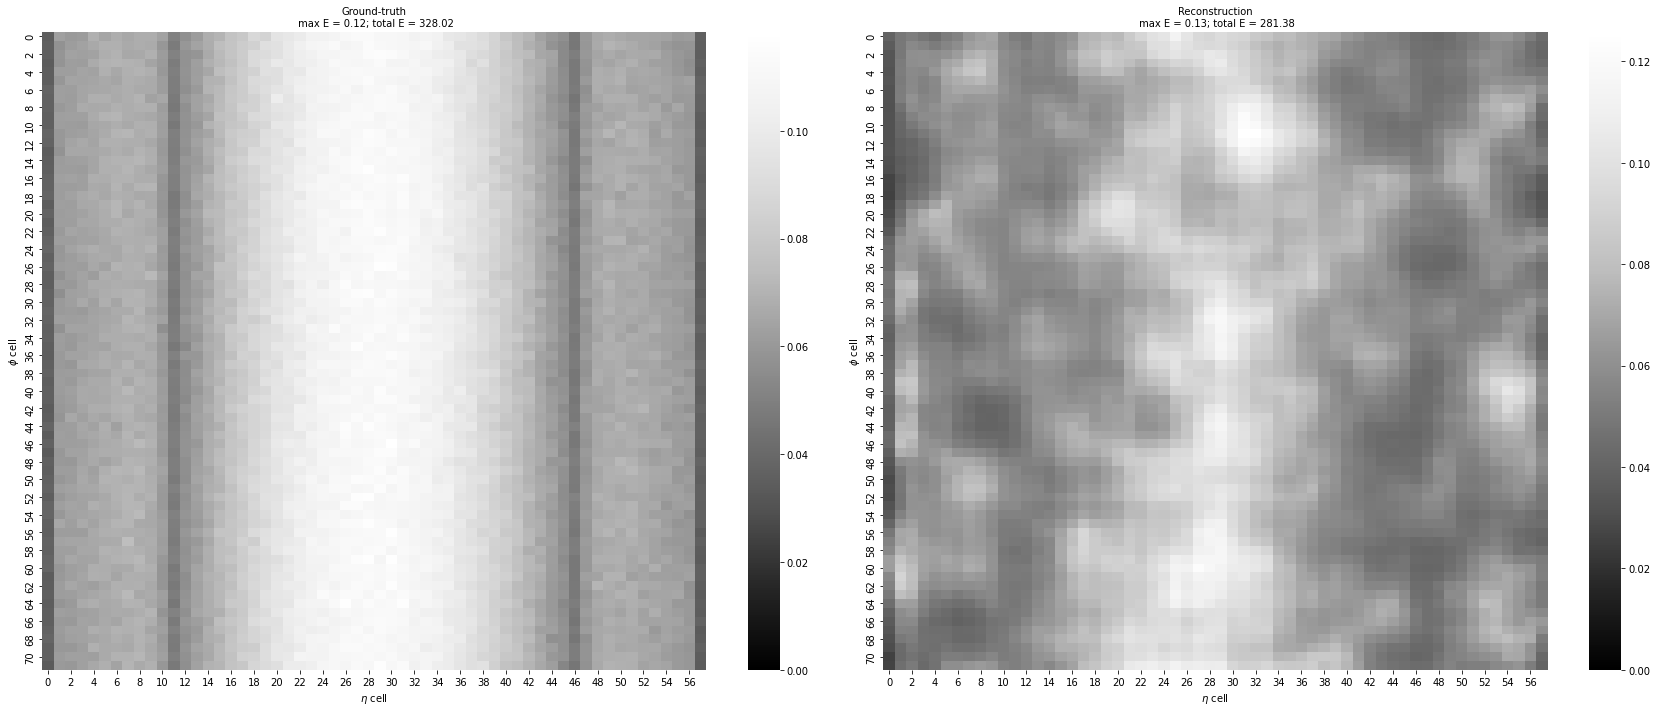

SVJ (2.1)


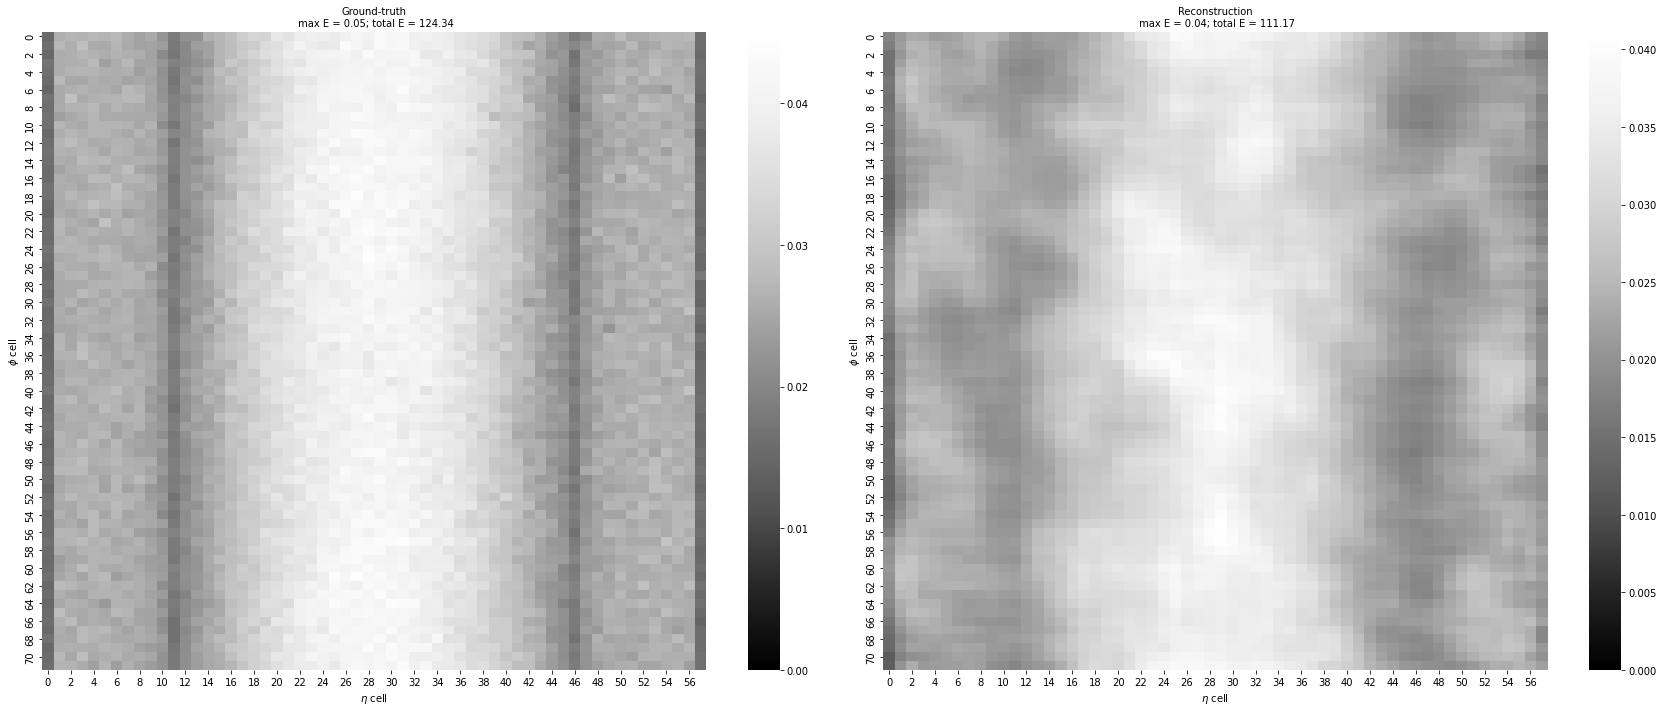

SVJ (3.1)


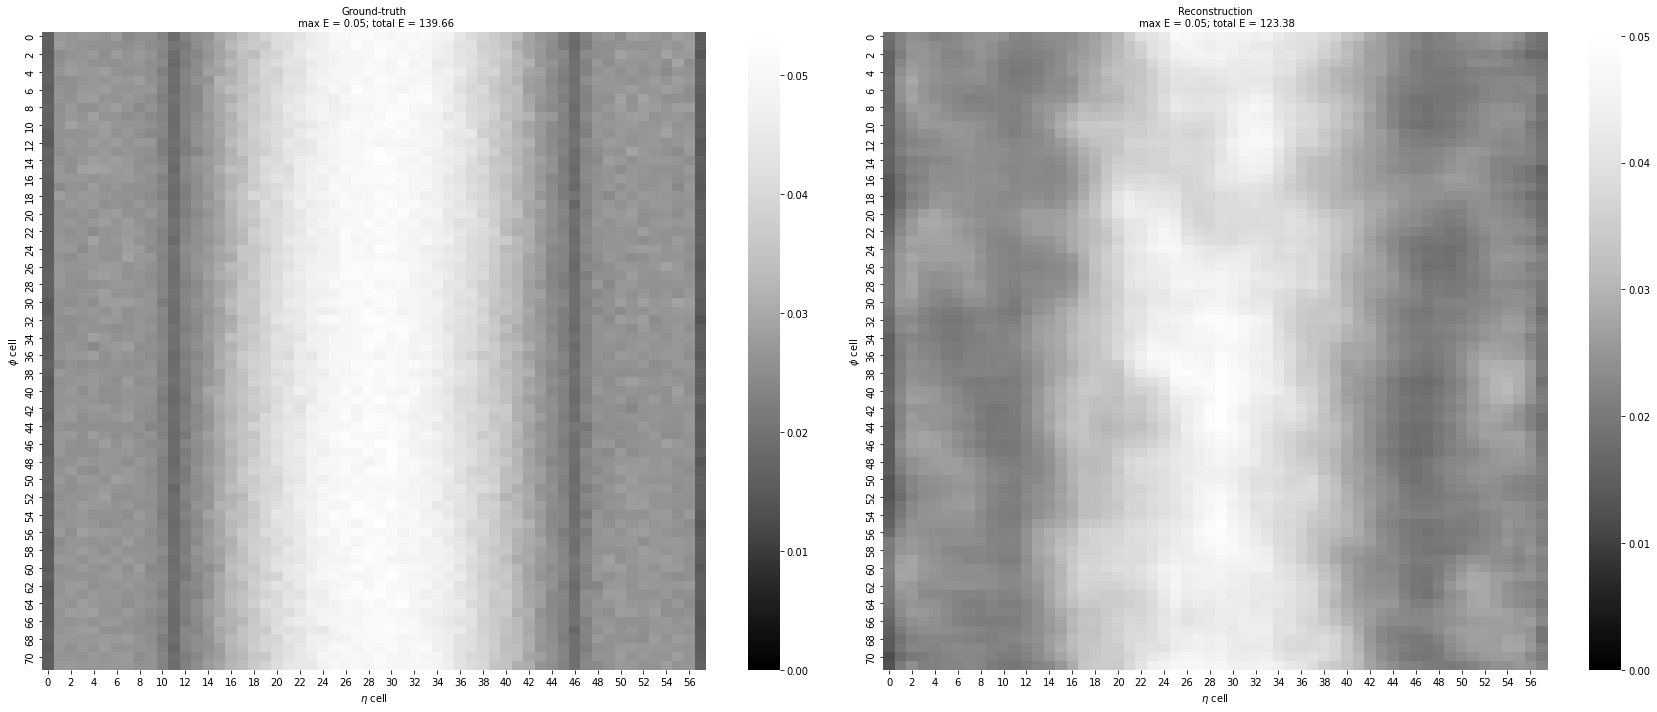

SVJ (4.1)


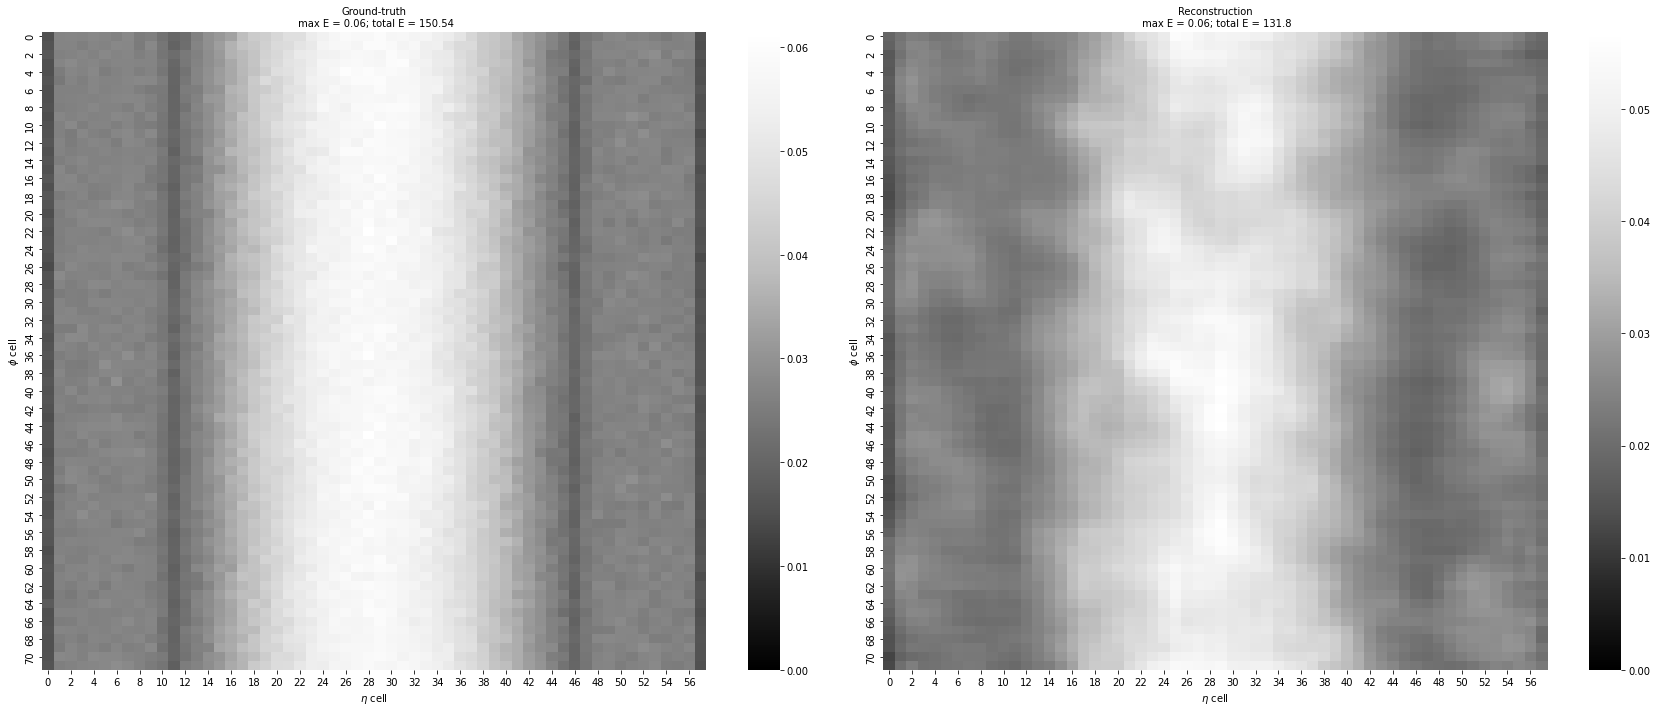

In [14]:
with tf.device('cpu'):
    ad.eval2.average_predictions(model, x=x_mask, y=y_test, m=m_test, cmap=ad.plot.CMAP3,
                                 batch_size=128, verbose=1)

Reconstruction-based Anomaly Scores

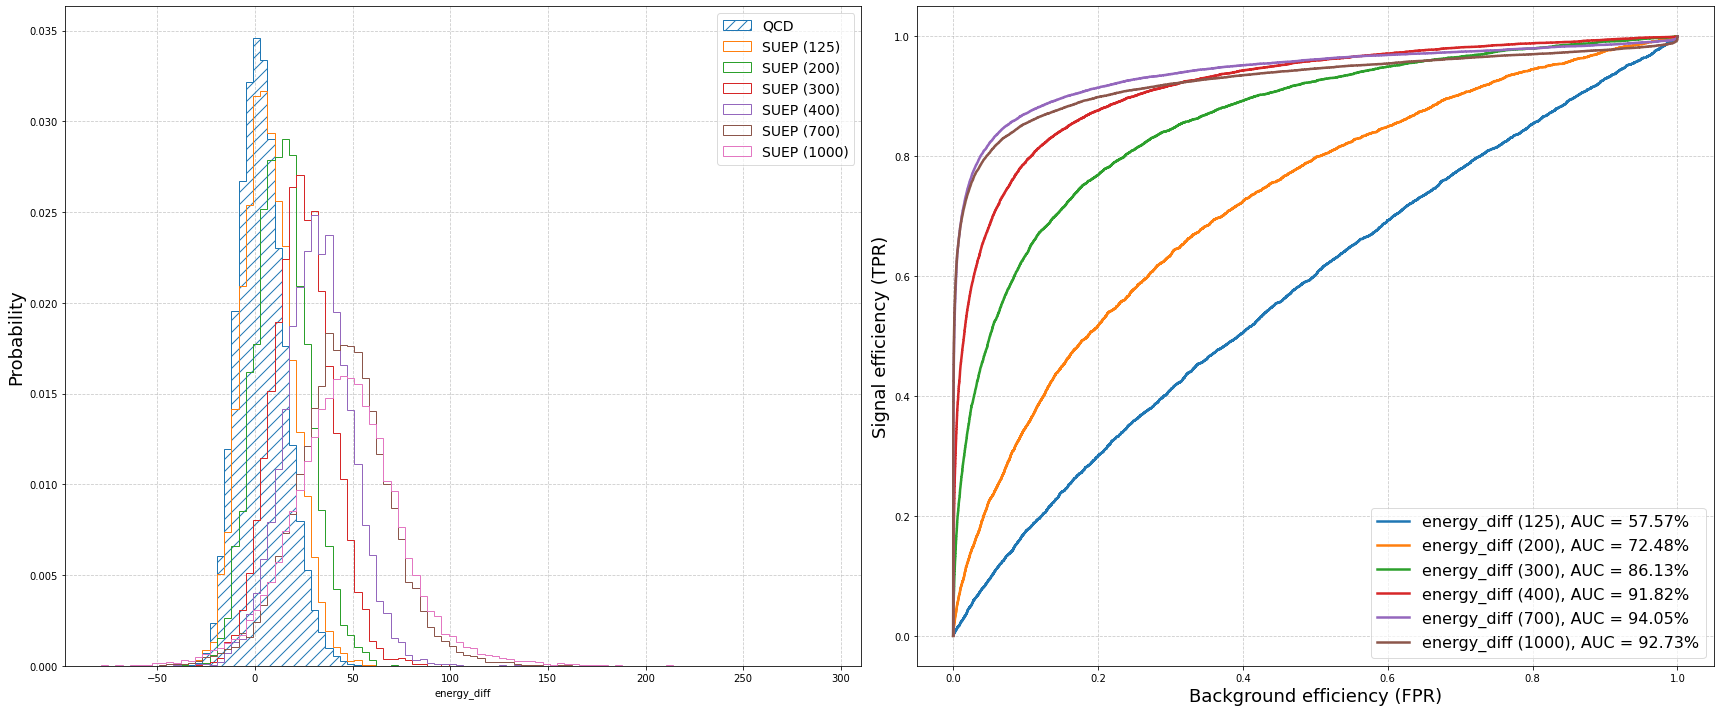

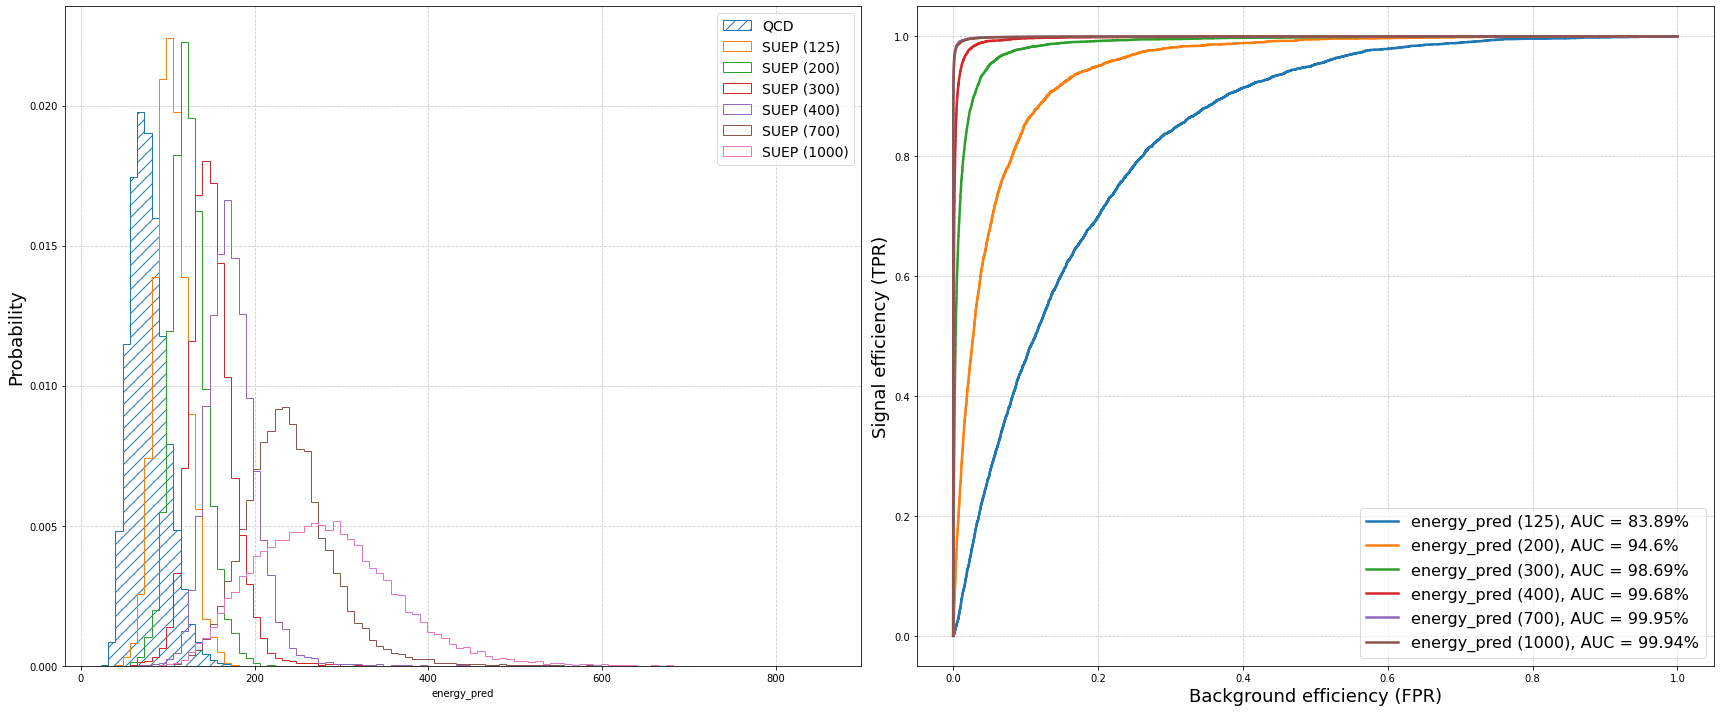

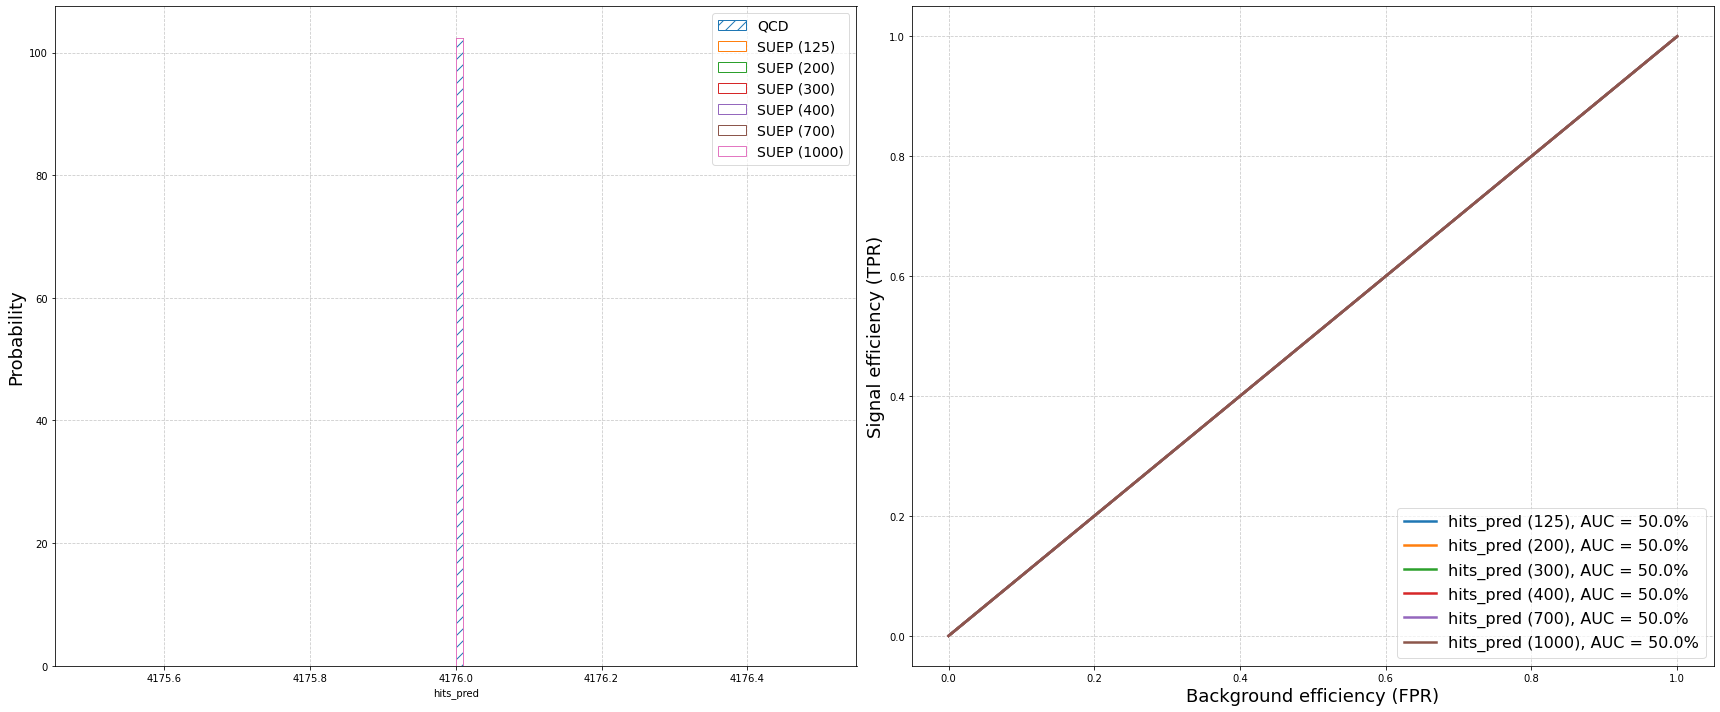

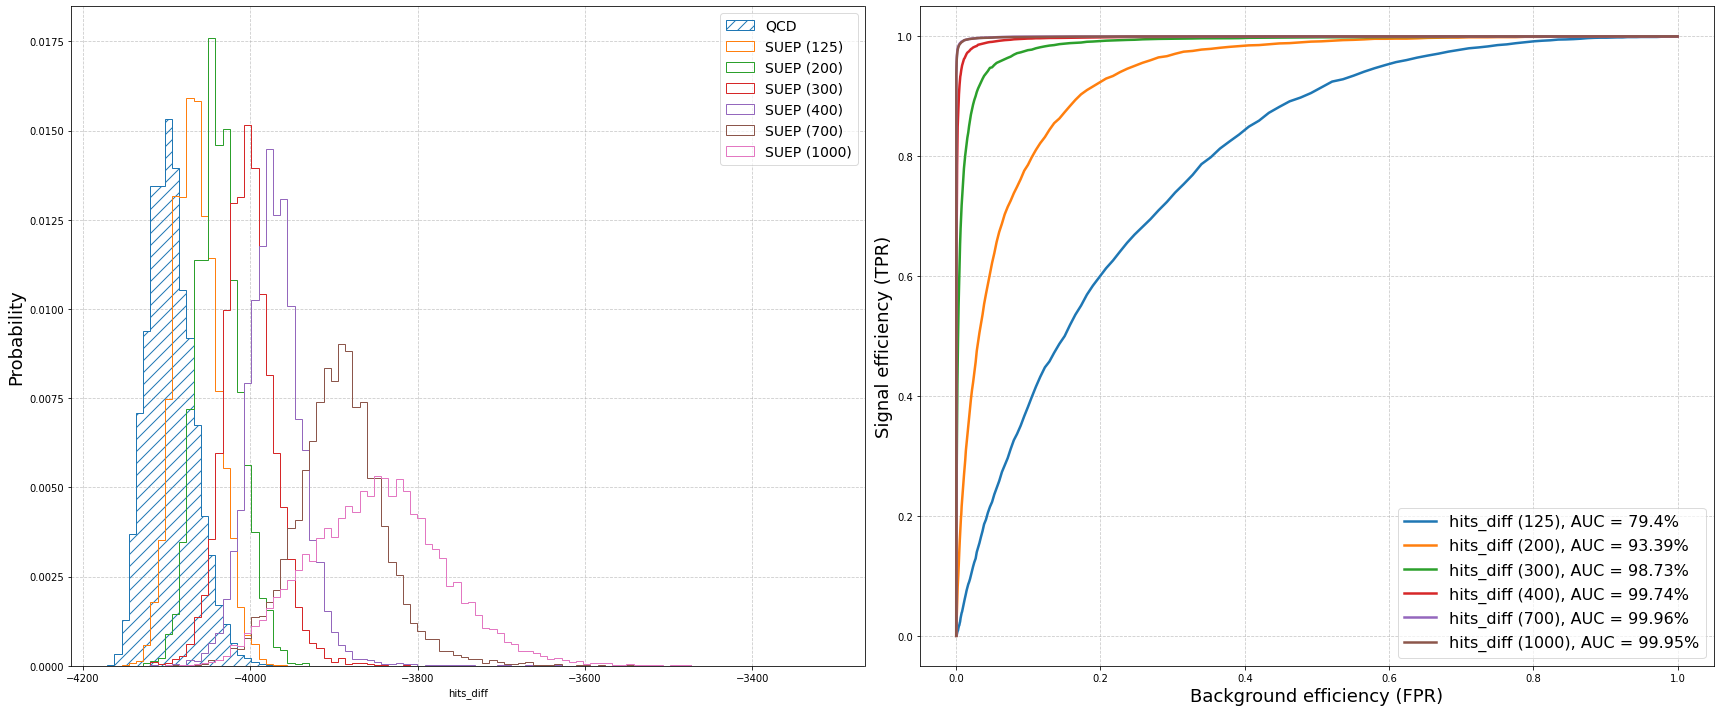

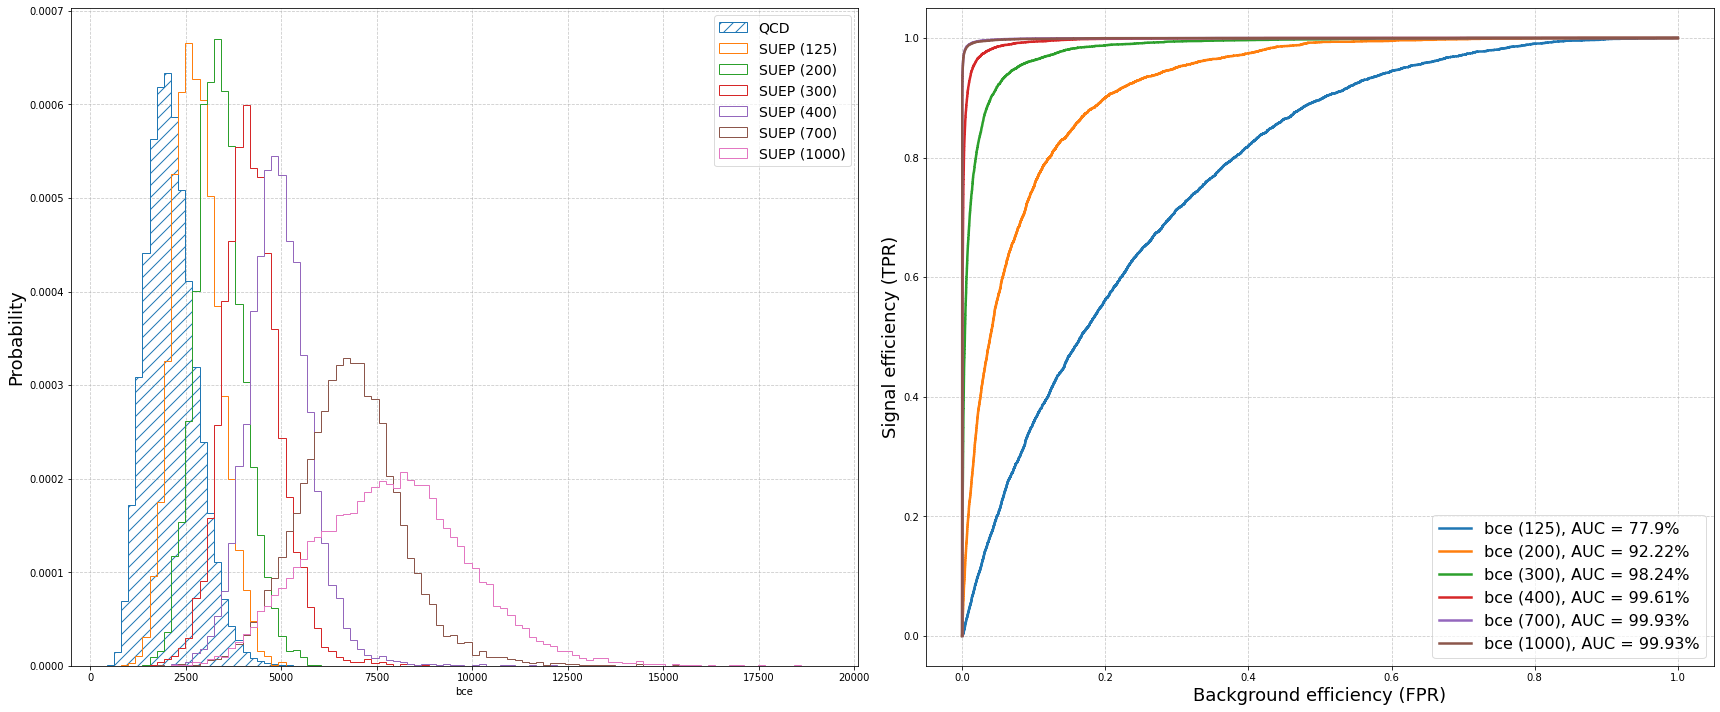

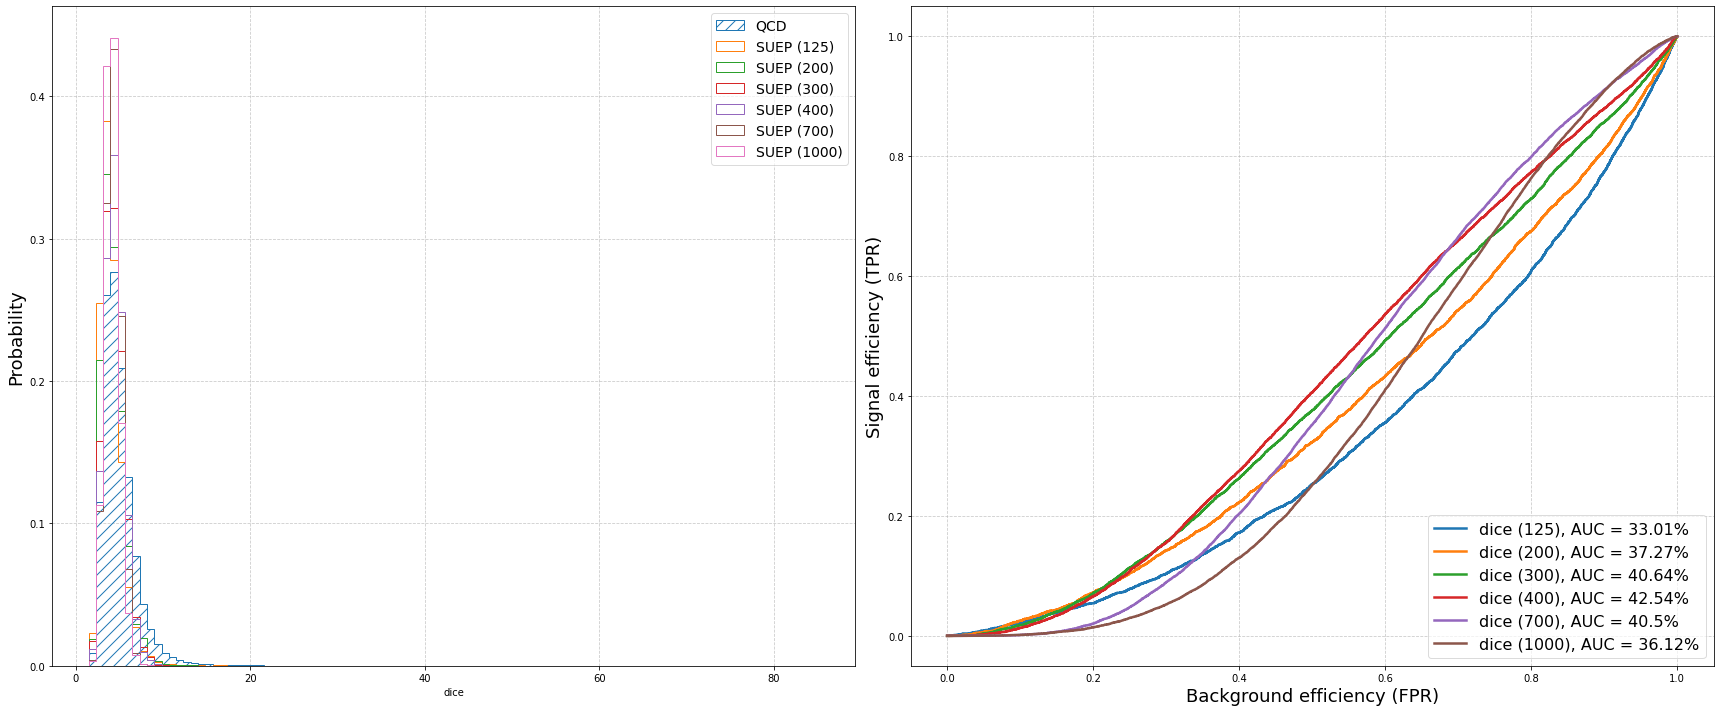

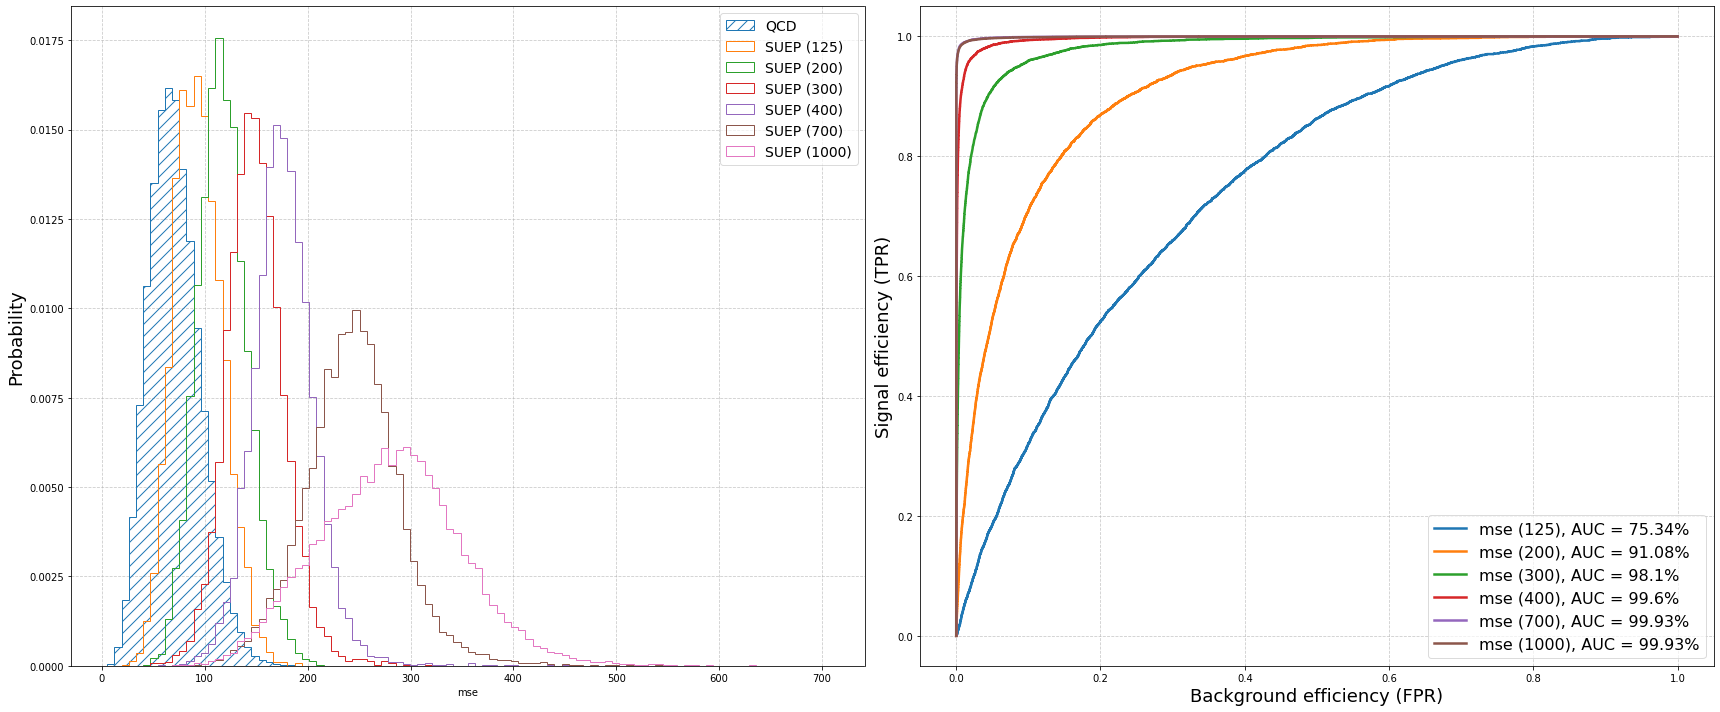

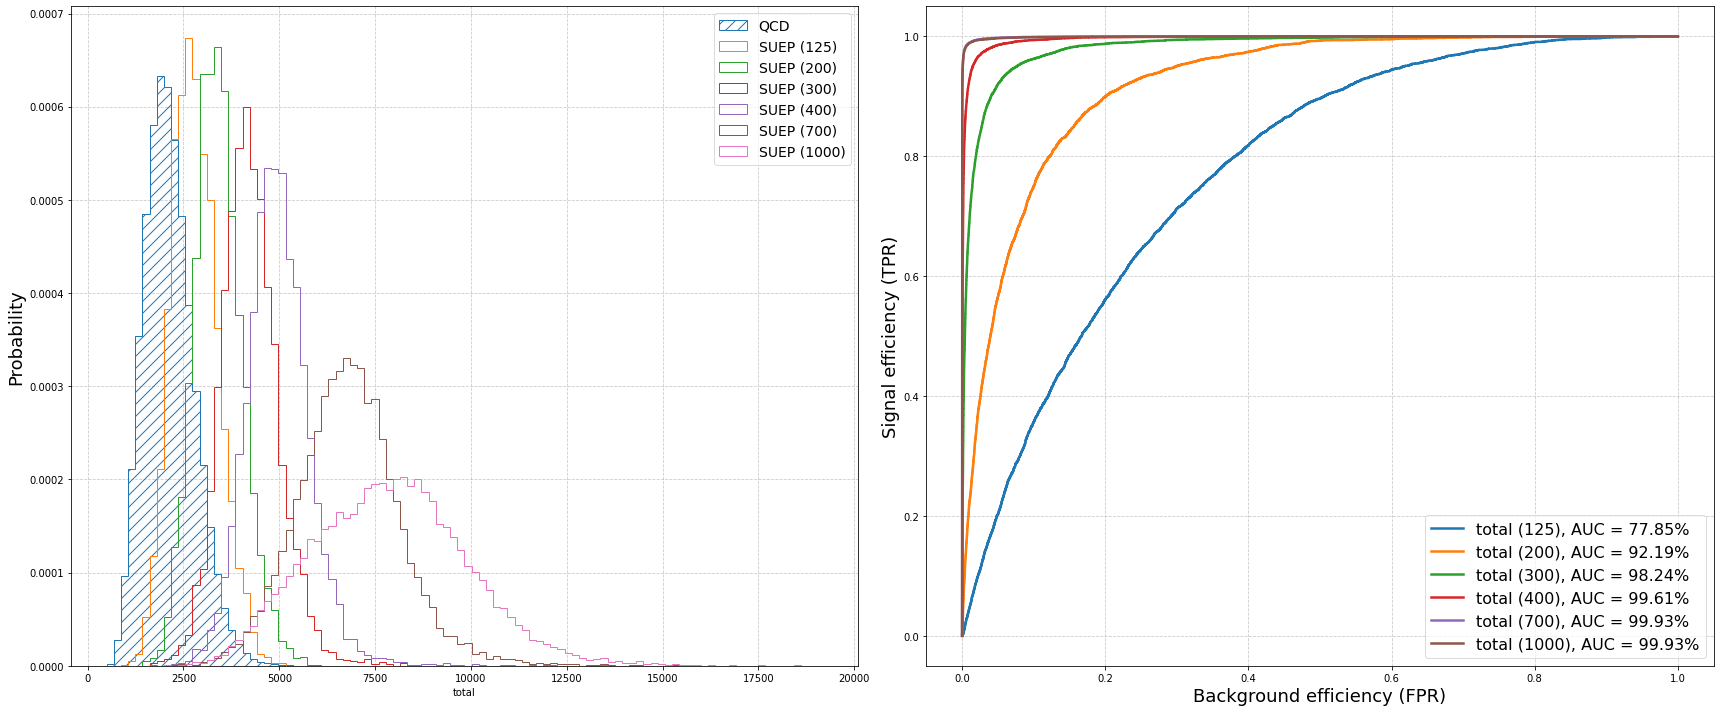

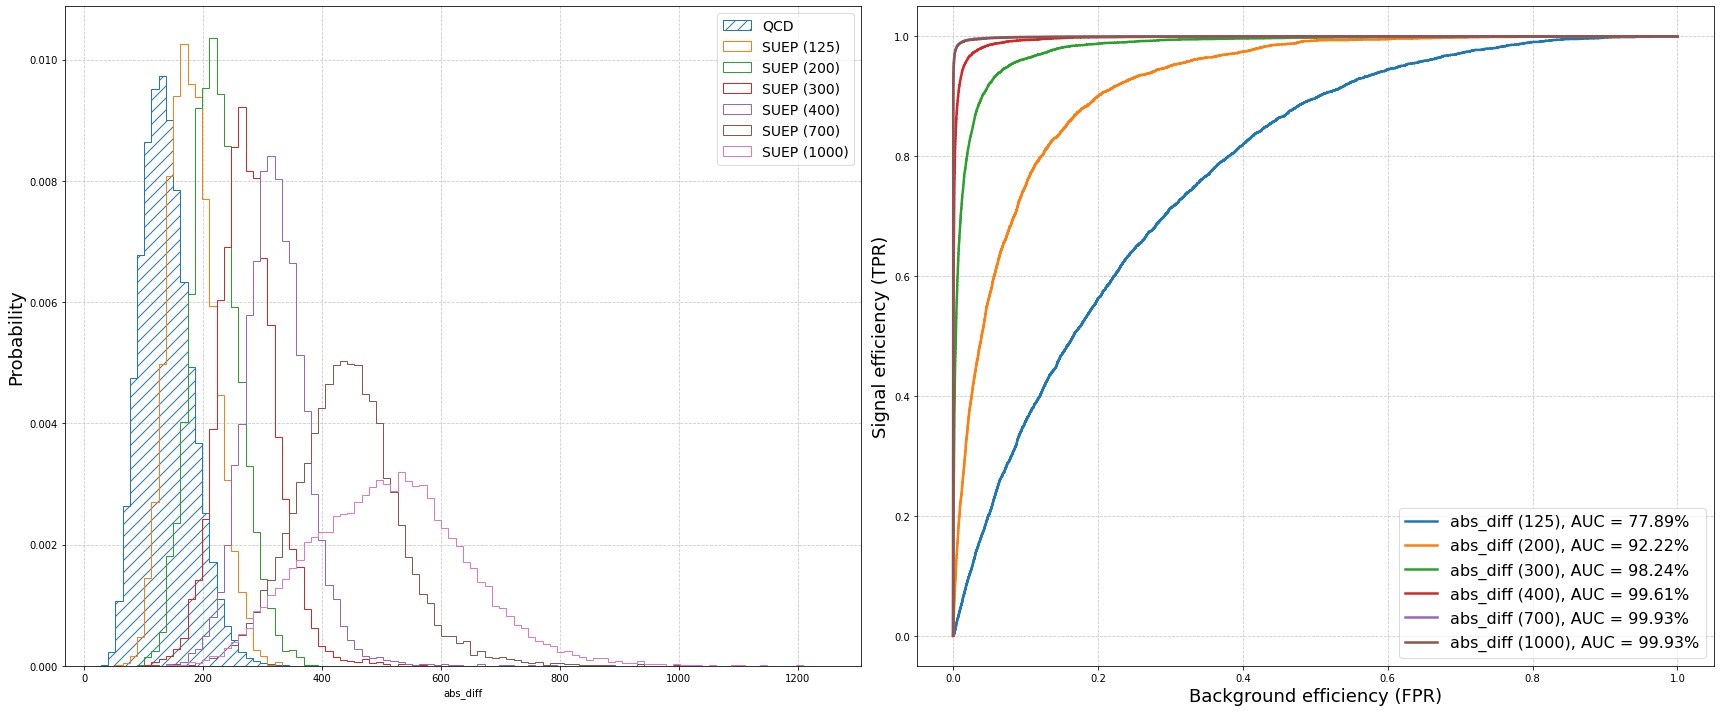

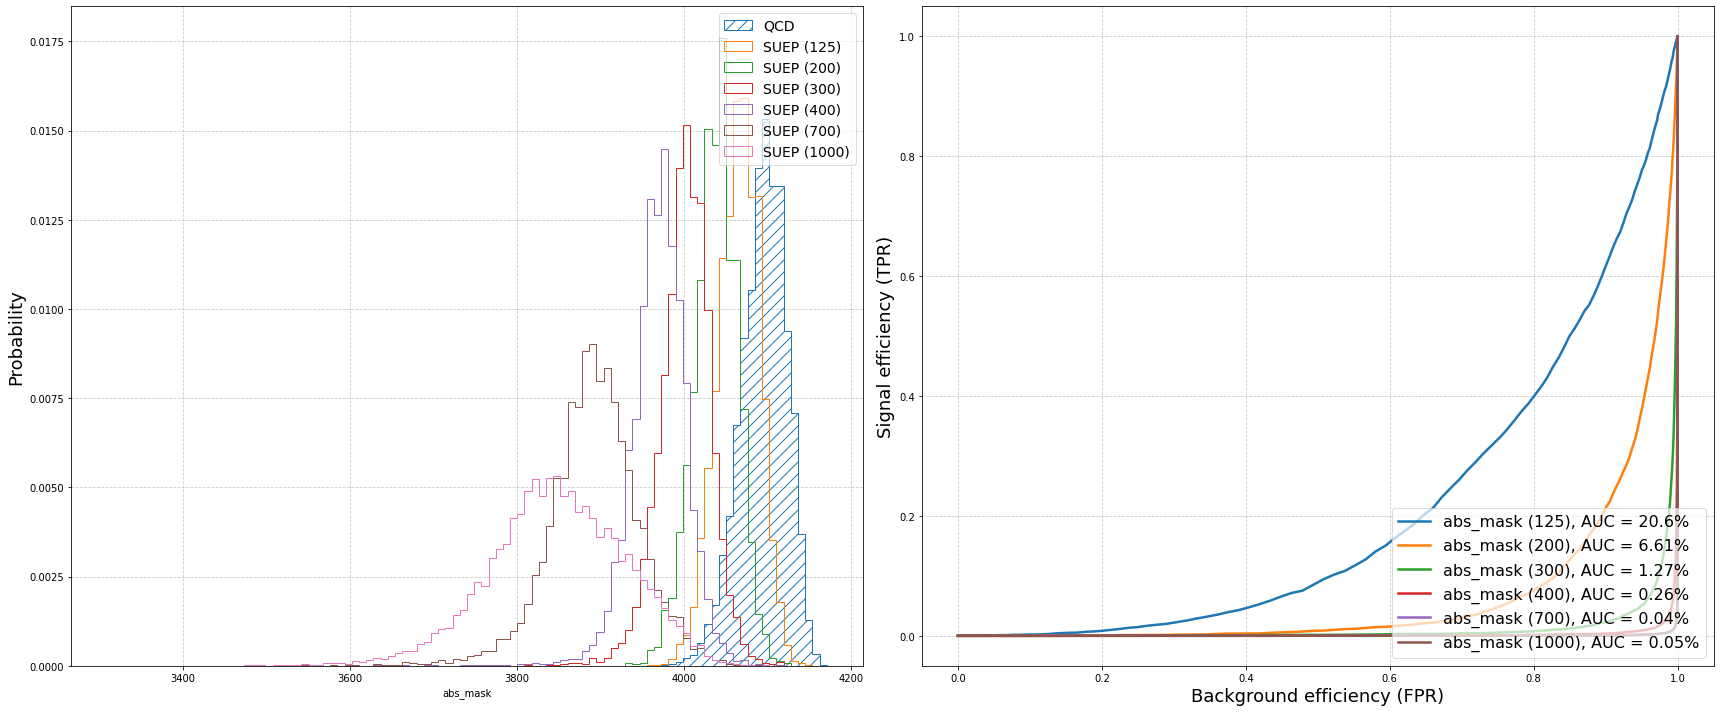

[energy_pred] Avg: 96.13%, AUC: [83.89 94.6  98.69 99.68 99.95 99.94]
[hits_diff]   Avg: 95.19%, AUC: [79.4  93.39 98.73 99.74 99.96 99.95]
[bce]         Avg: 94.64%, AUC: [77.9  92.22 98.24 99.61 99.93 99.93]
[abs_diff]    Avg: 94.64%, AUC: [77.89 92.22 98.24 99.61 99.93 99.93]
[total]       Avg: 94.62%, AUC: [77.85 92.19 98.24 99.61 99.93 99.93]
[mse]         Avg: 94.0%, AUC: [75.34 91.08 98.1  99.6  99.93 99.93]
[energy_diff] Avg: 82.47%, AUC: [57.57 72.48 86.13 91.82 94.05 92.73]
[hits_pred]   Avg: 50.0%, AUC: [50. 50. 50. 50. 50. 50.]
[dice]        Avg: 38.35%, AUC: [33.01 37.27 40.64 42.54 40.5  36.12]
[abs_mask]    Avg: 4.81%, AUC: [20.6   6.61  1.27  0.26  0.04  0.05]
[energy_pred] Avg: 1.73%, FPR@40: [8.2203, 1.9042, 0.211, 0.0347, 0.0, 0.0]
[hits_diff]   Avg: 2.13%, FPR@40: [10.5264, 2.0879, 0.1461, 0.0094, 0.0, 0.0]
[bce]         Avg: 2.46%, FPR@40: [11.9916, 2.5507, 0.2133, 0.0241, 0.0, 0.0]
[abs_diff]    Avg: 2.46%, FPR@40: [11.9922, 2.5507, 0.2133, 0.0241, 0.0, 0.0]
[tota

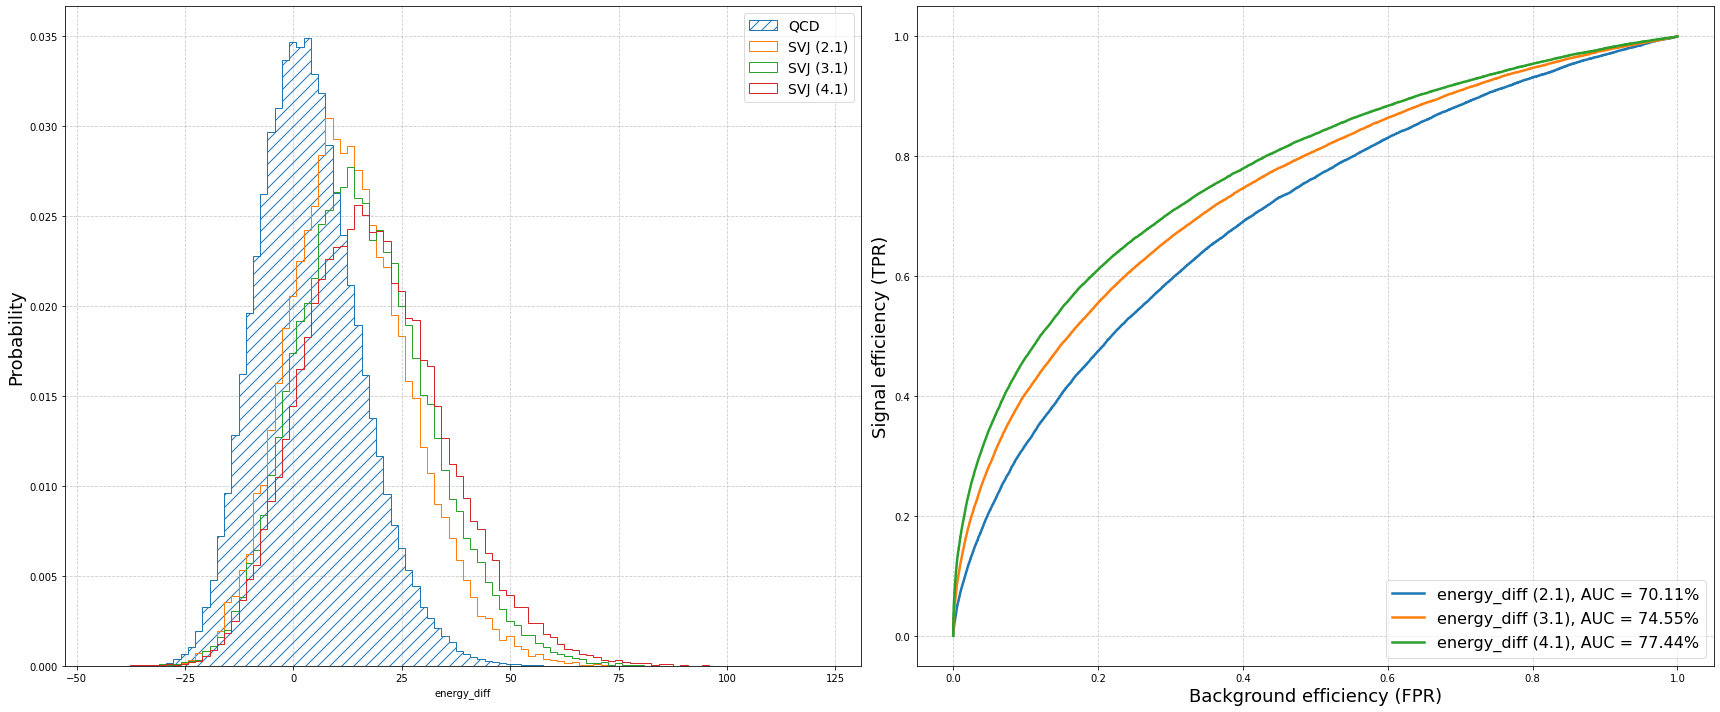

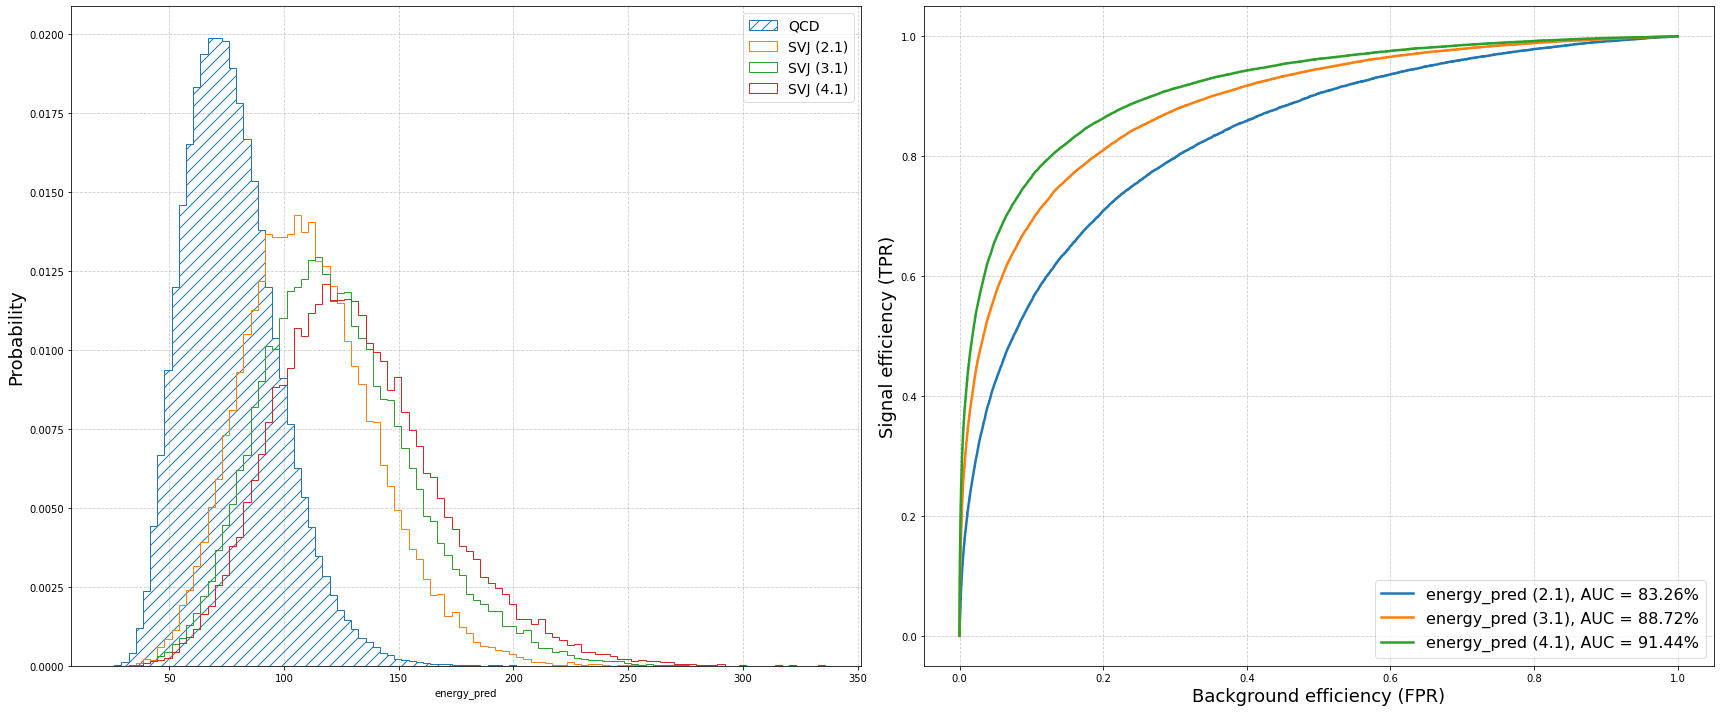

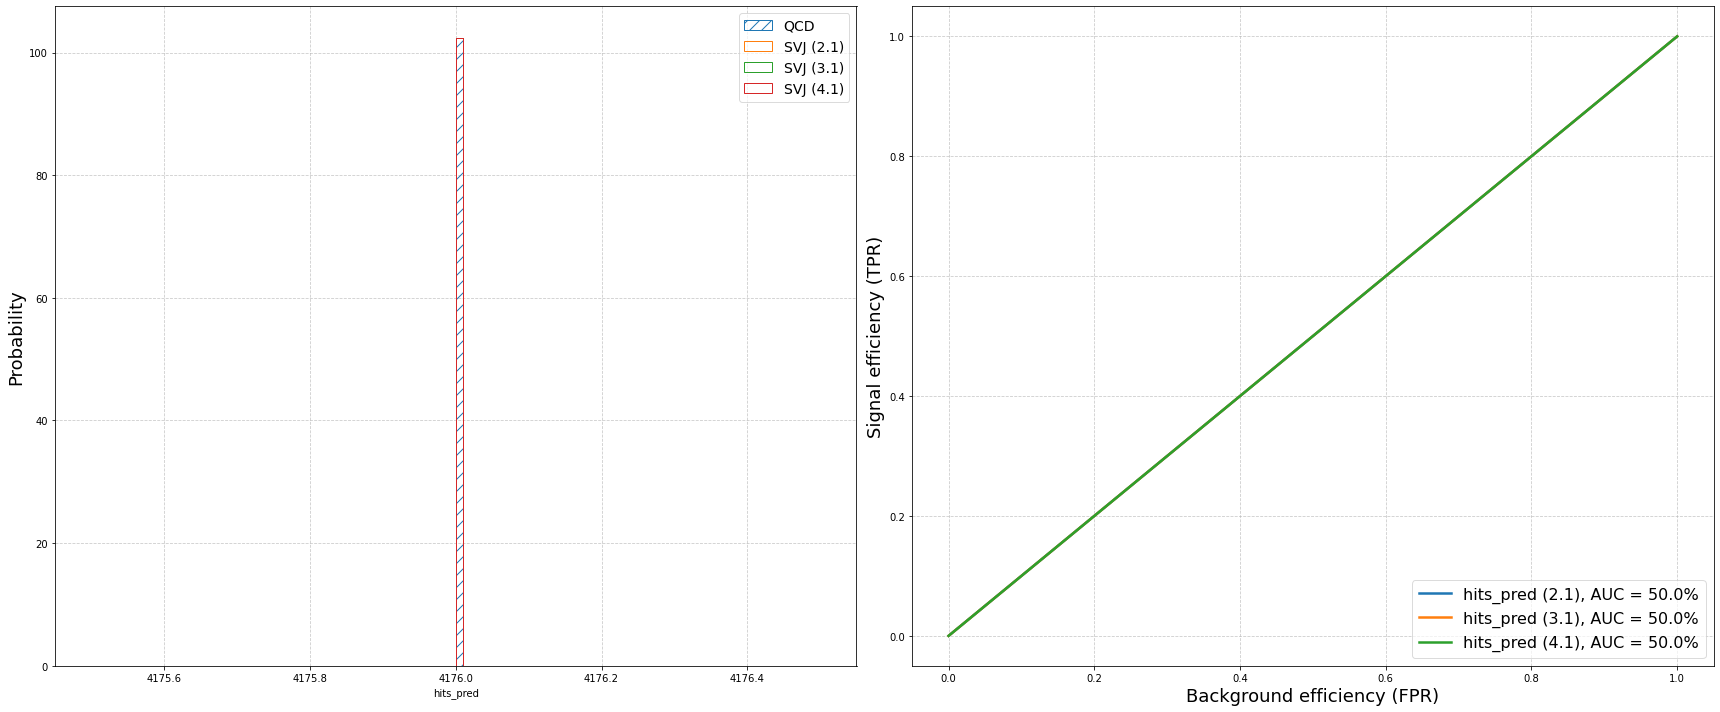

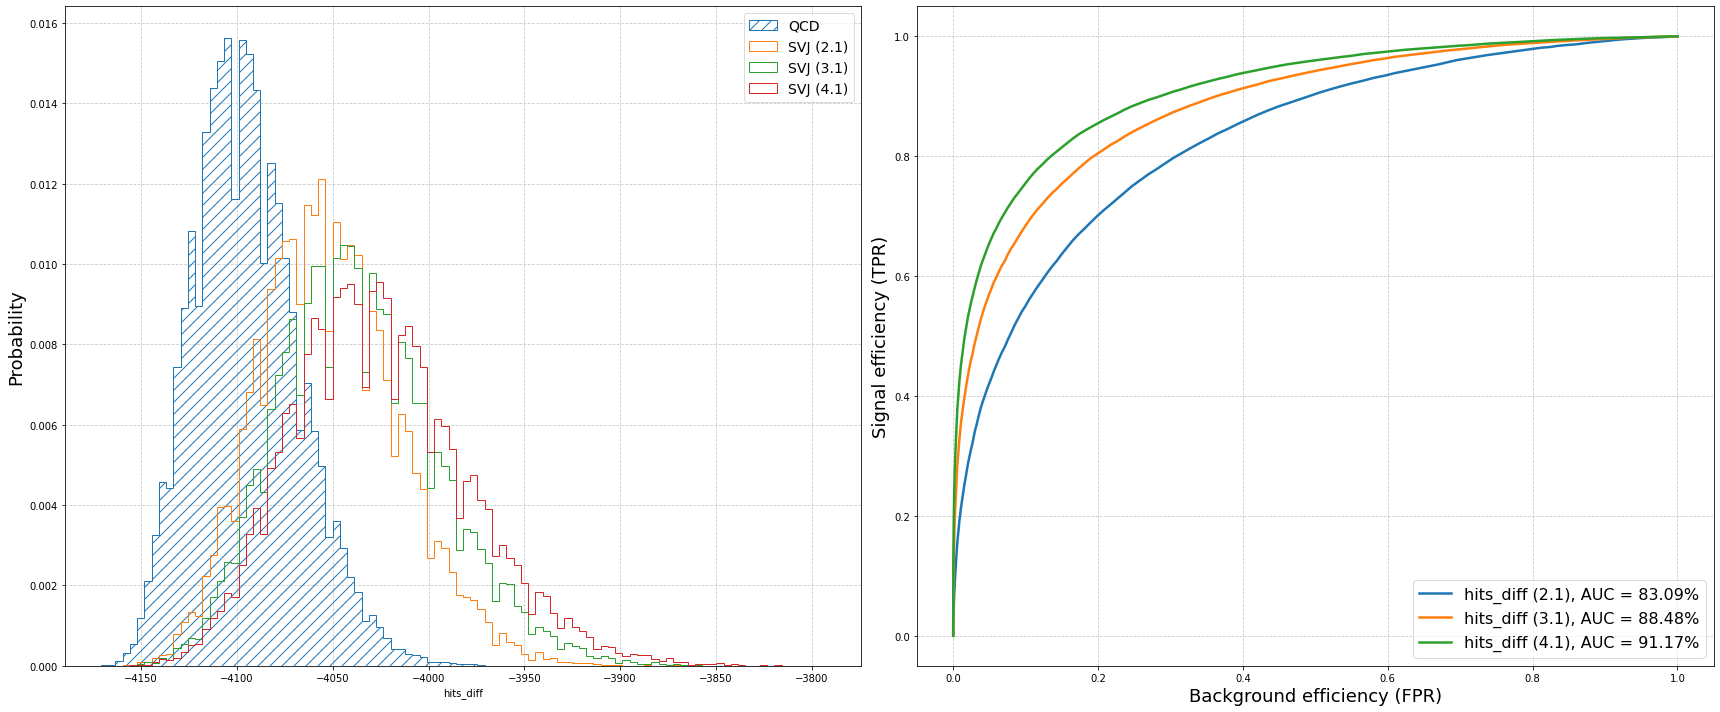

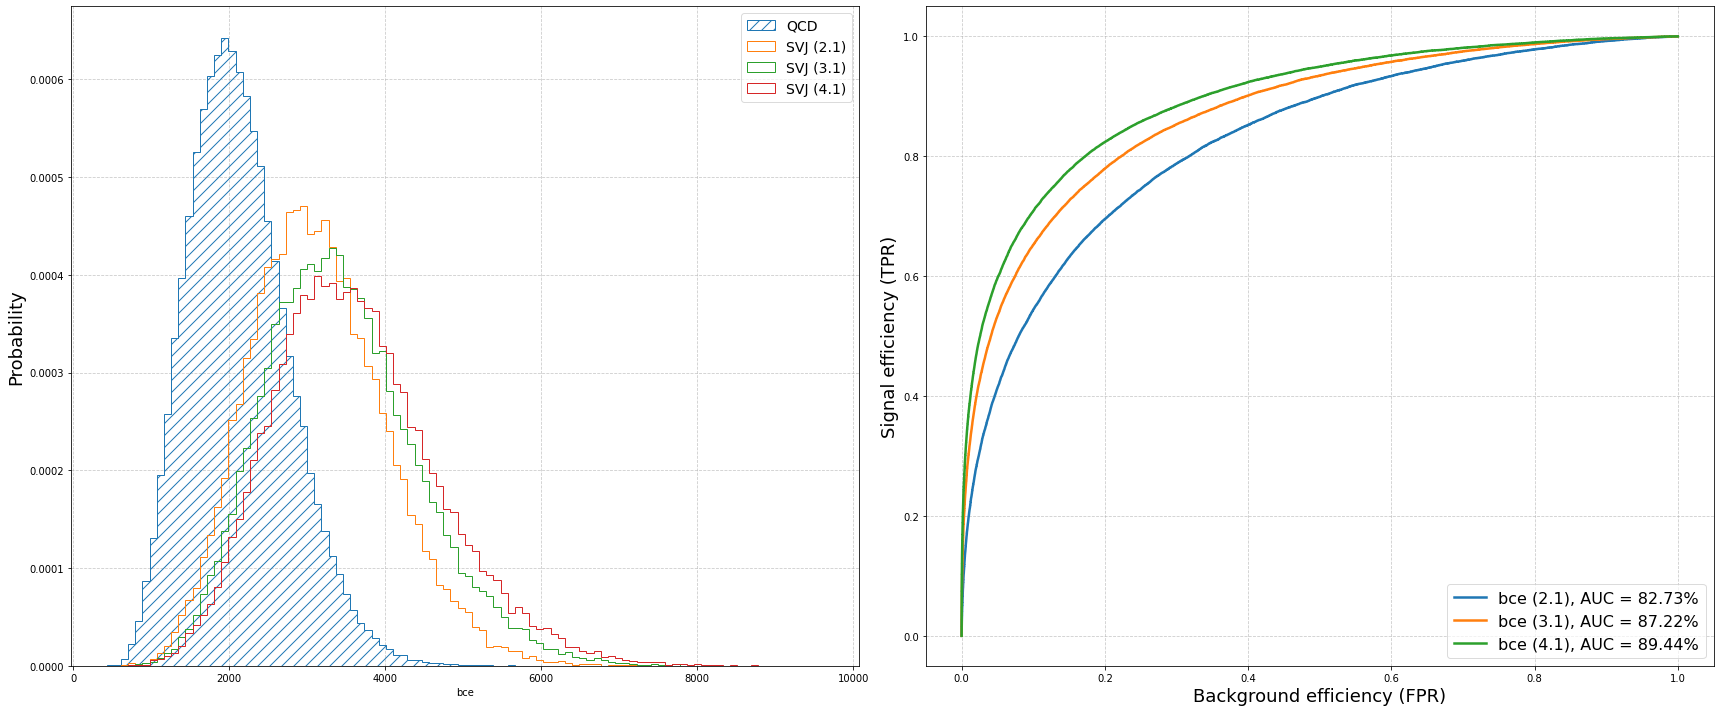

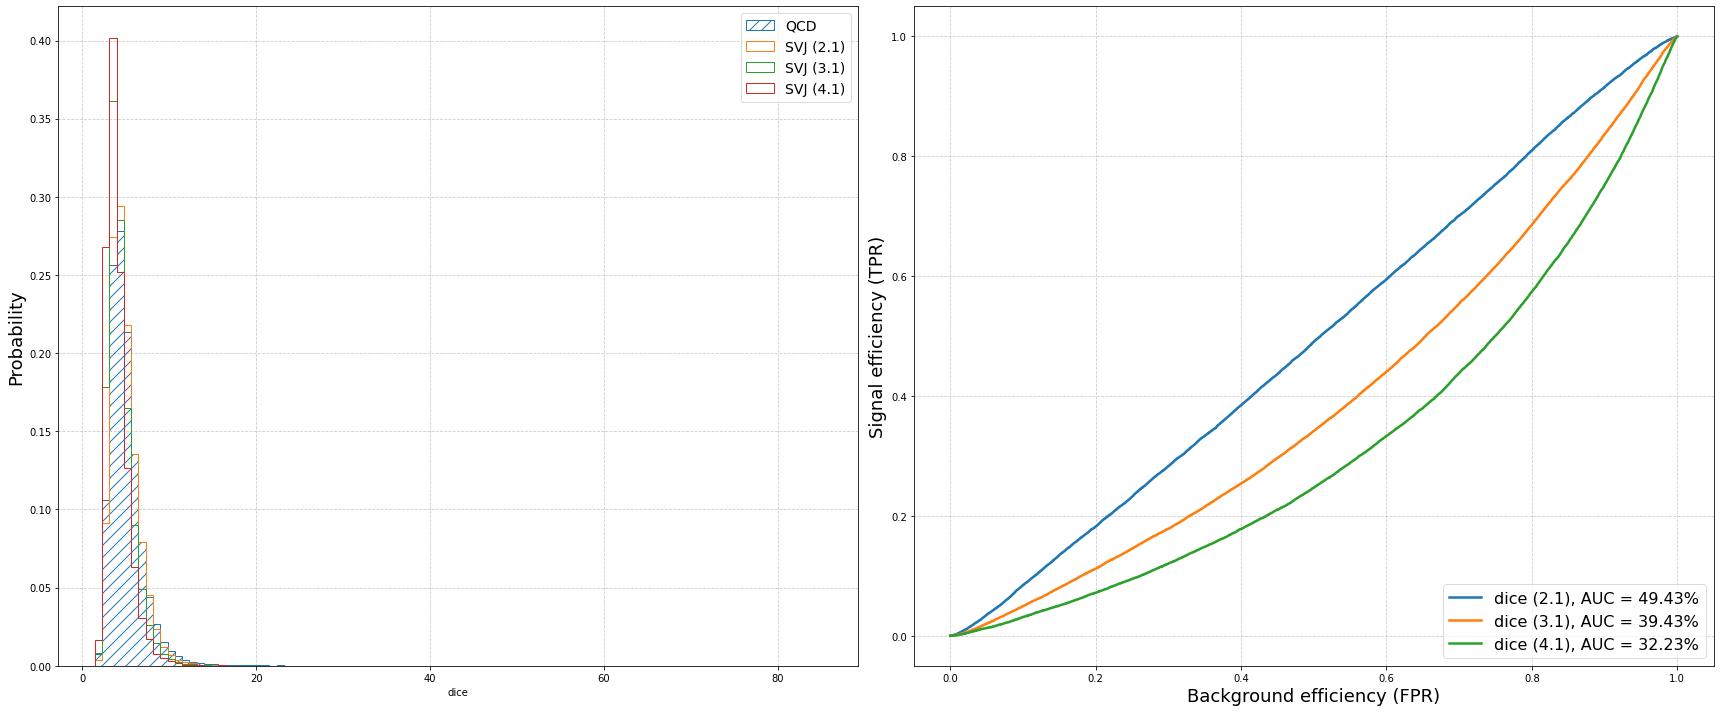

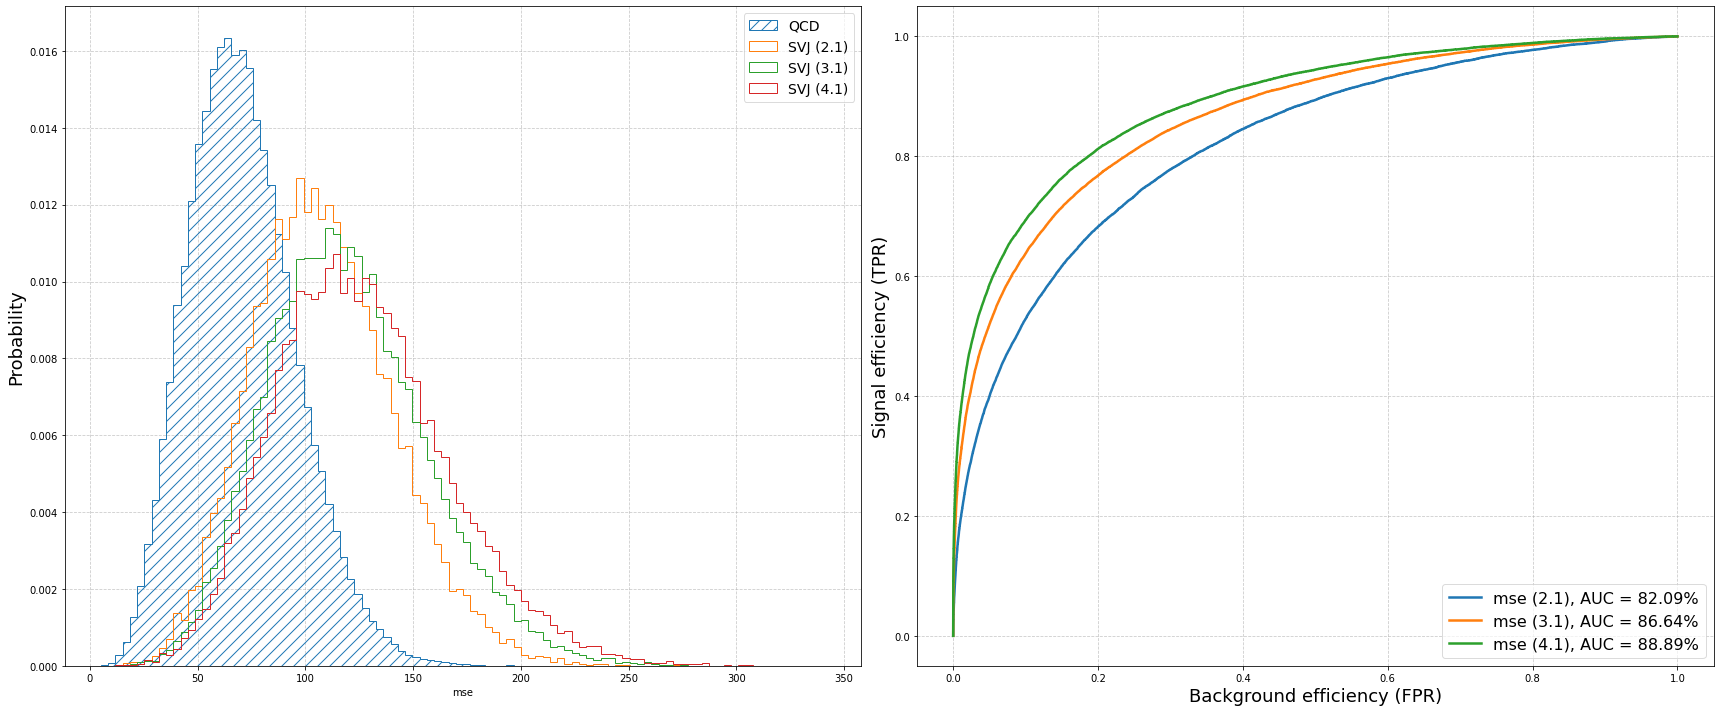

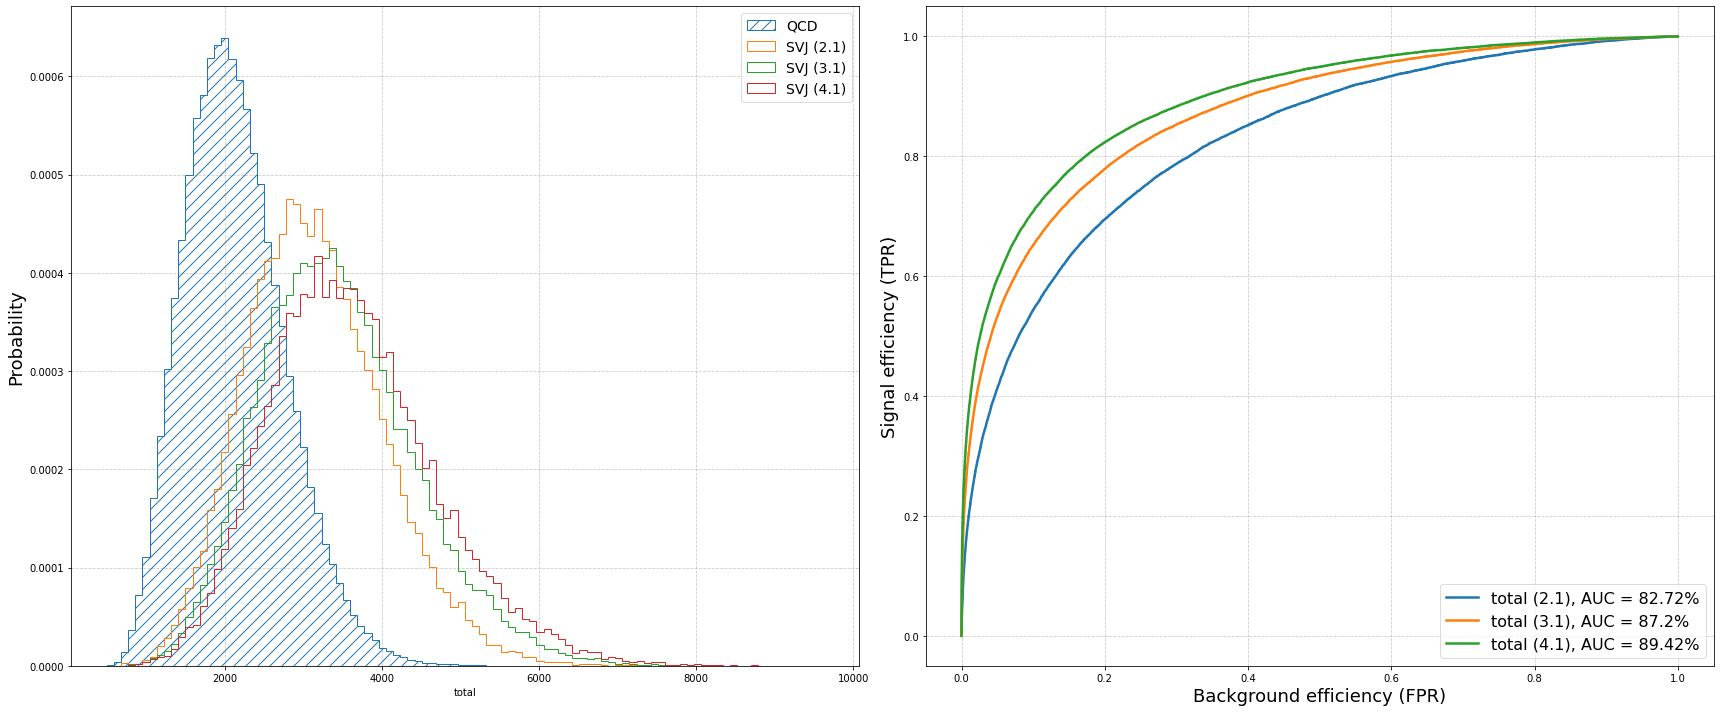

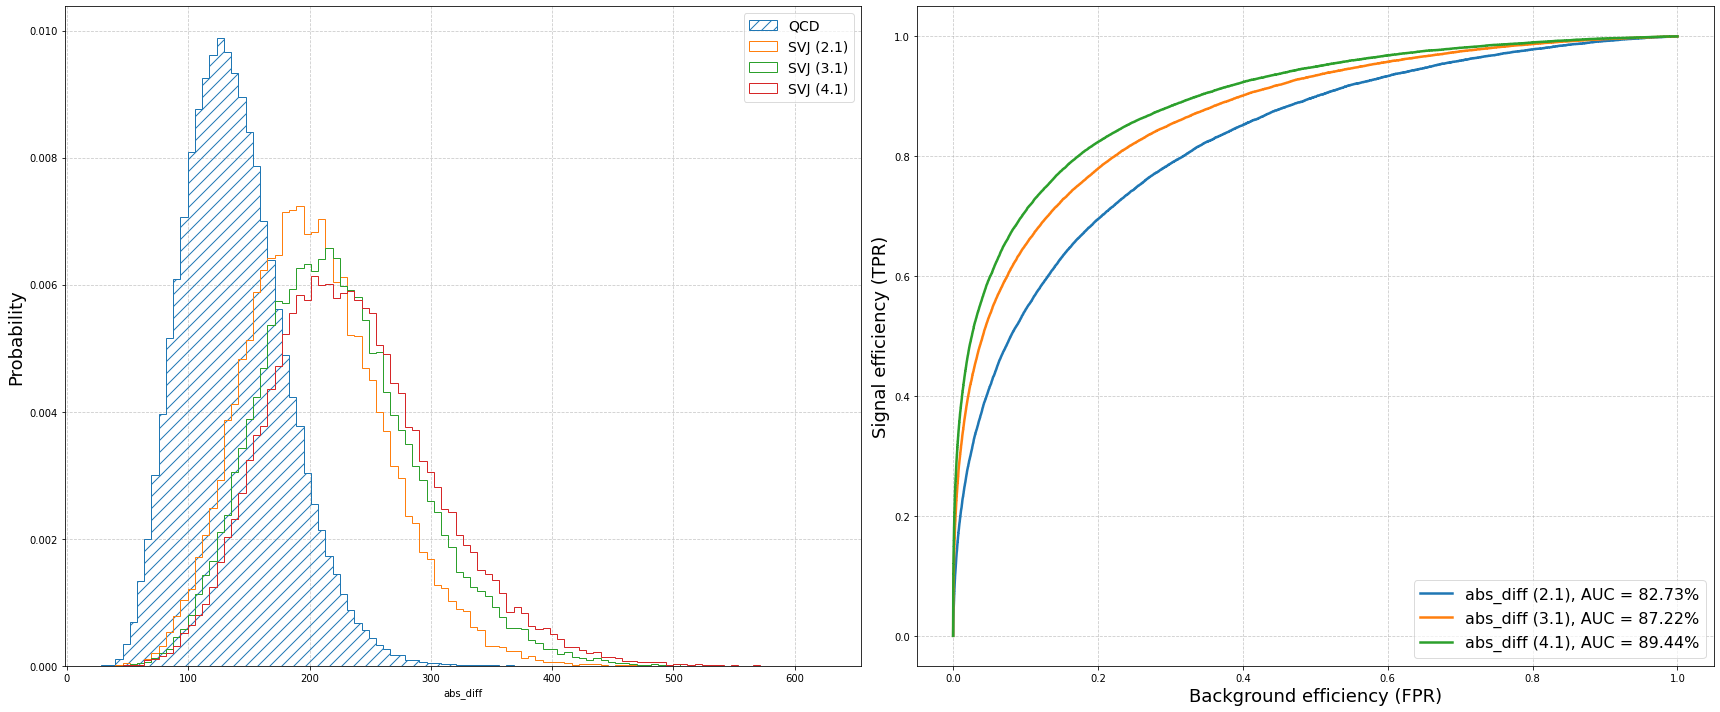

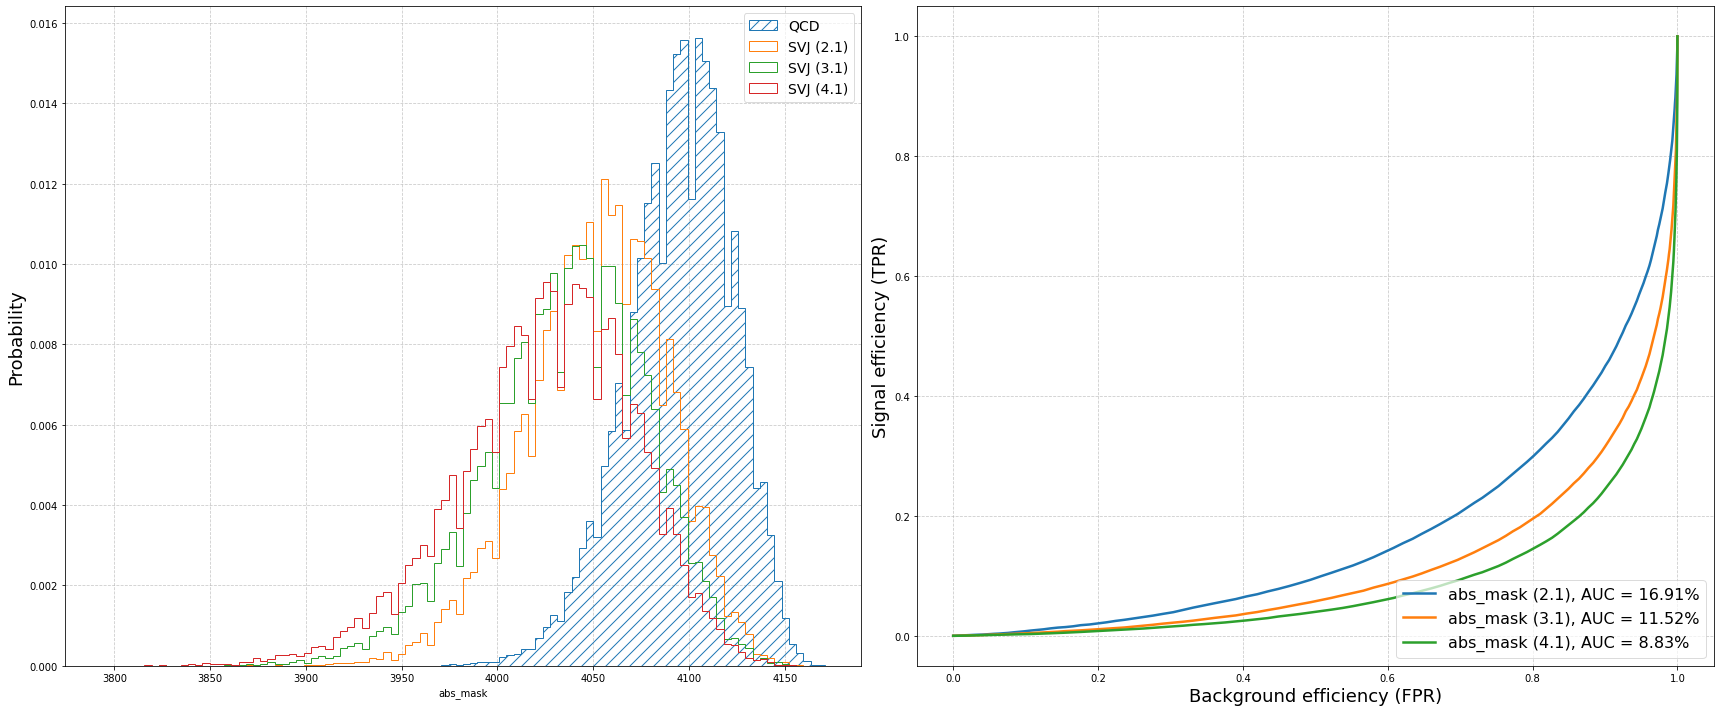

[energy_pred] Avg: 87.81%, AUC: [83.26 88.72 91.44]
[hits_diff]   Avg: 87.58%, AUC: [83.09 88.48 91.17]
[bce]         Avg: 86.46%, AUC: [82.73 87.22 89.44]
[abs_diff]    Avg: 86.46%, AUC: [82.73 87.22 89.44]
[total]       Avg: 86.44%, AUC: [82.72 87.2  89.42]
[mse]         Avg: 85.87%, AUC: [82.09 86.64 88.89]
[energy_diff] Avg: 74.04%, AUC: [70.11 74.55 77.44]
[hits_pred]   Avg: 50.0%, AUC: [50. 50. 50.]
[dice]        Avg: 40.36%, AUC: [49.43 39.43 32.23]
[abs_mask]    Avg: 12.42%, AUC: [16.91 11.52  8.83]
[hits_diff]   Avg: 2.21%, FPR@40: [4.3535, 1.5787, 0.6955]
[energy_pred] Avg: 2.32%, FPR@40: [4.3461, 1.7396, 0.8628]
[bce]         Avg: 2.64%, FPR@40: [4.61, 2.0846, 1.2283]
[abs_diff]    Avg: 2.64%, FPR@40: [4.6129, 2.0846, 1.2295]
[total]       Avg: 2.65%, FPR@40: [4.6176, 2.0899, 1.2324]
[mse]         Avg: 2.86%, FPR@40: [5.012, 2.2768, 1.2877]
[energy_diff] Avg: 10.51%, FPR@40: [14.7615, 9.7278, 7.0296]
[hits_pred]   Avg: 40.0%, FPR@40: [40.0, 40.0, 40.0]
[dice]        Avg: 54.

In [9]:
scores = ad.eval2.anomaly_scores(model, x=x_mask, y=y_test, m=m_test)

roc1 = ad.plot.roc_per_mass(bkg_scores=scores['qcd'], signal_scores=scores['suep'])
ad.eval2.print_by_auc(roc1)
ad.eval2.print_fpr_at_n_tpr(roc1)

roc2 = ad.plot.roc_per_mass(bkg_scores=scores['qcd'], signal_scores=scores['svj'])
ad.eval2.print_by_auc(roc2)
ad.eval2.print_fpr_at_n_tpr(roc2)